# Proyek Analisis Data: E-Commerce Public Dataset

## Menentukan Pertanyaan Bisnis

Pertanyaan Analisis Bisnis
1. Produk apa saja yang memberikan kontribusi revenue terbesar, dan bagaimana kontribusinya terhadap total revenue secara keseluruhan?
2. Bagaimana distribusi metode pembayaran yang digunakan pelanggan, dan metode mana yang mendominasi?
3. Apakah rating ulasan pelanggan memengaruhi nilai penjualan (revenue)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import warnings
warnings.filterwarnings('ignore', message='missing ScriptRunContext', category=UserWarning)

# Data Wrangling

## Data Gathering

In [2]:
customers = pd.read_csv("customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation = pd.read_csv("geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items = pd.read_csv("order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments = pd.read_csv("order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews = pd.read_csv("order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders = pd.read_csv("orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_translation = pd.read_csv("product_category_name_translation.csv")
product_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products = pd.read_csv("products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers = pd.read_csv("sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### INSIGHT GATHERING DATA

## Assessing Data

### Menilai tabel 'customers'

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
print("Jumlah duplikasi: ",customers.duplicated().sum())
customers.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Menilai tabel 'geolocation'

In [13]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [14]:
print("Jumlah duplikasi: ",geolocation.duplicated().sum()) # Hapus data yang terdapat duplikasi

Jumlah duplikasi:  261831


In [15]:
geolocation.describe()
# 'geolocation_lat' must be in -90 until 90
# 'geolocation_lng' nust be in -180 until 180, and harus bernilai negatig , karena Brazil berada di belahan barat (western hemisphere)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Menilai tabel 'order_items'

In [16]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
print("Jumlah duplikasi: ",order_items.duplicated().sum()) # Hapus data yang terdapat duplikasi
order_items.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Menilai tabel 'order_payments'

In [18]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
print("Jumlah duplikasi: ",order_payments.duplicated().sum()) # Hapus data yang terdapat duplikasi
order_payments.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Menilai tabel 'order_reviews'

In [20]:
order_reviews.info() #Terdapat Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [21]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", order_reviews.duplicated().sum())
order_reviews.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Menilai tabel 'orders'

In [23]:
orders.info() #Terdapat Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [24]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", orders.duplicated().sum())
orders.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Menilai tabel 'product_category_translation'

In [26]:
product_category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [27]:
print("Jumlah duplikasi: ", product_category_translation.duplicated().sum())
product_category_translation.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Menilai tabel 'products'

In [28]:
products.info() #Terdapat Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [29]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [30]:
print("Jumlah duplikasi: ", products.duplicated().sum())
products.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Menilai tabel 'sellers'

In [31]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [32]:
print("Jumlah duplikasi: ", sellers.duplicated().sum())
sellers.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### INSIGHT ASSESSING DATA

## Cleaning Data

### Menghilangkan Duplicate Data

#### Table 'geolocation'

In [33]:
# Cleaning Duplicate Data on 'geolocation'
print("Jumlah duplikasi: ",geolocation.duplicated().sum()) # Hapus data yang terdapat duplikasi
geolocation = geolocation.drop_duplicates()
print("Jumlah duplikasi setelah dilakukan penghapusan duplikasi: ",geolocation.duplicated().sum())

Jumlah duplikasi:  261831
Jumlah duplikasi setelah dilakukan penghapusan duplikasi:  0


### Handle Missing Values

#### Table 'order_reviews'

In [34]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [35]:
# Isi kolom review_comment_message dengan placeholder
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna('No Title')
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('No Comment')
order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [36]:
# Periksa hasil
print(order_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


#### Table 'orders'

In [37]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [38]:
# Mengonversi beberapa kolom ke tipe datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Delete missing values on 'order_approved_at', because it only has 160 data
orders = orders.dropna(subset=['order_approved_at'])

# Mengisi order_delivered_carrier_date berdasarkan rata-rata durasi
carrier_duration = (orders['order_delivered_carrier_date'] - orders['order_approved_at']).dt.total_seconds() / 3600
average_carrier_duration = carrier_duration.mean()
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna(orders['order_approved_at'] + pd.to_timedelta(average_carrier_duration, unit='h'))

# Mengisi order_delivered_customer_date berdasarkan rata-rata durasi
customer_duration = (orders['order_delivered_customer_date'] - orders['order_approved_at']).dt.total_seconds() / 3600
average_customer_duration = customer_duration.mean()
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(orders['order_approved_at'] + pd.to_timedelta(average_customer_duration, unit='h'))

# Periksa hasil
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99281 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99281 non-null  datetime64[ns]
 6   order_delivered_customer_date  99281 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB
None


In [39]:
orders[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().sum()

order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
dtype: int64

#### Table 'products'

In [40]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [41]:
# Mengisi product_category_name dengan 'unknown'
products['product_category_name'] = products['product_category_name'].fillna('unknown')

# Mengisi kolom numerik lainnya dengan nilai median
numerical_columns = [
    'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g',
    'product_length_cm', 'product_height_cm', 'product_width_cm'
]

for col in numerical_columns:
    products[col] = products[col].fillna(products[col].median())

# Verifikasi hasil
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [42]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### Handle Inaccurate Data

#### Table 'geolocation'

In [43]:
# Optimasi tipe data
geolocation["geolocation_lat"] = geolocation["geolocation_lat"].astype("float32")
geolocation["geolocation_lng"] = geolocation["geolocation_lng"].astype("float32")
geolocation["geolocation_city"] = geolocation["geolocation_city"].astype("category")
geolocation["geolocation_state"] = geolocation["geolocation_state"].astype("category")

# Setelah optimasi
print(geolocation.info())

# Filter nilai latitude dan longitude di luar rentang yang valid
# 'geolocation_lat' must be in -90 until 90

invalid_lat_lng = geolocation[
    (geolocation['geolocation_lat'] < -90) | (geolocation['geolocation_lat'] > 90) |
    (geolocation['geolocation_lng'] < -180) | (geolocation['geolocation_lng'] > 180)
]

# Menampilkan data invalid
# Tidak ada invalid data
invalid_lat_lng

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   geolocation_zip_code_prefix  738332 non-null  int64   
 1   geolocation_lat              738332 non-null  float32 
 2   geolocation_lng              738332 non-null  float32 
 3   geolocation_city             738332 non-null  category
 4   geolocation_state            738332 non-null  category
dtypes: category(2), float32(2), int64(1)
memory usage: 19.3 MB
None


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [44]:
# 'geolocation_lng' nust be in -180 until 180, and harus bernilai negatif , karena Brazil berada di belahan barat (western hemisphere)
# Filter nilai longitude yang positif (kemungkinan tidak valid untuk Brasil)
positive_lng = geolocation[geolocation['geolocation_lng'] > 0]

# Menampilkan data dengan longitude positif
positive_lng

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
513754,28155,42.439285,13.820214,santa maria,RJ
727755,57319,45.065933,9.341528,pau d'arco,AL
965687,95130,14.585073,121.105392,santa lucia do piai,RS


In [45]:
# Menampilkan jumlah data sebelum penghapusan
print(f"Jumlah data sebelum menghapus longitude positif: {len(geolocation)}")

# Menghapus 'geolocation_lat' yang bernilai positif dari tabel asli
geolocation = geolocation[geolocation['geolocation_lng'] <= 0]

# Menampilkan jumlah data setelah penghapusan
print(f"Jumlah data setelah menghapus longitude positif: {len(geolocation)}")

Jumlah data sebelum menghapus longitude positif: 738332
Jumlah data setelah menghapus longitude positif: 738329


#### Table 'order_items'

In [46]:
# Mengubah tipe data 'shipping_limit_date' ke 'datetime'
# Mengonversi shipping_limit_date ke datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [47]:
# Nilai min 'price' terlalu rendah = 0.85 (range 'price' yang terlalu jauh dibandingkan yang lain) -> terlalu kecil untuk produk e-commerce
# Nilai max 'price' terlalu tinggi = 6735.00 (range 'price' yang terlalu jauh dibandingkan yang lain) -> pastikan harganya sesuai dengan produk yang dijual
# Filter nilai price yang terlalu rendah atau terlalu tinggi
extreme_price = order_items[(order_items['price'] < 5) | (order_items['price'] > 3000)]
extreme_price

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
532,0136390286be8a34efdc801ed150568f,1,1716ea399ed8ee62ba811e6f55180f45,6338ea67c41078a46ad99cc009654956,2017-07-20 12:35:15,3.49,16.79
533,0136390286be8a34efdc801ed150568f,2,1716ea399ed8ee62ba811e6f55180f45,6338ea67c41078a46ad99cc009654956,2017-07-20 12:35:15,3.49,16.79
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
7550,111e8cdb5890a7e3beae3e717737ca51,1,ba82e510acd9a0fe69a44cafea53f9aa,0e44d110fa6a54e121cb2c095a77762f,2017-11-08 12:30:27,4.20,11.85
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
108990,f7a94ed5a5cf7c0680e0d3271163bb3f,4,0d13a341a2916308175bc9e89bdafb73,334cab711dee080b079fa5779b584783,2018-07-03 01:31:03,4.90,12.79
108991,f7a94ed5a5cf7c0680e0d3271163bb3f,5,0d13a341a2916308175bc9e89bdafb73,334cab711dee080b079fa5779b584783,2018-07-03 01:31:03,4.90,12.79
109923,f9ccaff7267fd0cf076e795b1fae8b69,1,44d53f1240d6332232e4393c06500475,b64d51f0435e884e8de603b1655155ae,2018-08-14 14:04:44,3.00,15.23
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21


In [48]:
# Nilai min 'freight_value' = 0.00. Tidak wajar karena pengiriman selalu memiliki biaya kecuali ada promo khusus atau datanya yang salah
# Nilai max 'freight_value' = 409.68. Nilai yang cukup tinggi untuk biaya pengiriman.
# Filter nilai freight_value yang nol atau sangat tinggi
extreme_freight = order_items[(order_items['freight_value'] == 0) | (order_items['freight_value'] > 100)]
extreme_freight

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.00
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.00
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.00
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.00
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.00
...,...,...,...,...,...,...,...
112182,fee19a0dc7358b6962a611cecf6a37b4,1,f1c7f353075ce59d8a6f3cf58f419c9c,37be5a7c751166fbc5f8ccba4119e043,2017-09-07 22:06:31,195.0,0.00
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21
112359,ff3e501f56dcf0752578d86df833558f,1,608af629c5b520efe1caf06e1cfc4abc,5dceca129747e92ff8ef7a997dc4f8ca,2017-10-27 21:14:33,299.9,170.11
112472,ff96d596c25445650eee60b94fa62244,1,f7b30f48c235d715e00822023d8a4dce,7238a95bb63ef7e498389fb863b834a1,2018-05-04 13:50:07,329.0,127.55


In [49]:
# Menghapus baris 'inaccurate data' :
order_items = order_items[(order_items['price'] >= 5) & (order_items['price'] <= 3000)]
order_items = order_items[(order_items['freight_value'] > 0) & (order_items['freight_value'] <= 100)]
order_items.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,111468.000000,111468,111468.000000,111468.000000
mean,1.195697,2018-01-07 01:36:33.293303808,116.920159,19.316793
min,1.000000,2016-09-19 00:15:34,5.000000,0.010000
25%,1.000000,2017-09-20 11:00:55.249999872,39.900000,13.080000
50%,1.000000,2018-01-25 17:31:01,74.900000,16.250000
75%,1.000000,2018-05-10 11:10:34,132.085000,21.100000
max,21.000000,2020-04-09 22:35:08,2999.900000,99.970000
std,0.688396,NaN,163.691717,11.987553


#### Tabel 'order_payments'

In [50]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [51]:
order_payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [52]:
# Menghapus 'not_defined', karena hanya memiliki 3 baris data yang tidak akan mempengaruhi anaslis.
order_payments = order_payments[order_payments['payment_type'] != 'not_defined']
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [53]:
order_payments['payment_type'] = order_payments['payment_type'].replace('not_defined', 'unknown')
order_payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64

In [54]:
# 'payment_installment' = jumlah cicilan pembayaran (harus dilakukan >=1 kali)
order_payments[order_payments['payment_installments'] <= 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [55]:
# Mengubah 'payment_installments' == 0 menjadi 1. Dikarenakan adanya kesalaha input
order_payments.loc[order_payments['payment_installments'] == 0, 'payment_installments'] = 1
# Verifikasi data setelah melakukan perubahan
order_payments[order_payments['payment_installments'] <= 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [56]:
# Verifikasi deskripsi setelah melakukan perubahan
order_payments['payment_installments'].describe()

count    103883.000000
mean          2.853422
std           2.687054
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [57]:
# Check 'payment_value' digunakan untuk mencatat pembayaran
# 'payment_value' == 0 dengan 'payment_type' == voucher, maka data 'payment_value' bukan merupakan data yang salah.
# Karena, customer menggunakan 'voucher penuh' untuk membayar produk yang mereka beli
order_payments[order_payments['payment_value'] <= 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


#### Tabel 'order_reviews'

In [58]:
# Mengubah datatype 'review_creation_date' dan 'review_answer_timestamp' menjadi 'datetime'
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [59]:
# Check urutan tanggal -> 'review_answer_timestamp' >= 'review_creation_date'
invalid_dates = order_reviews[order_reviews['review_answer_timestamp'] < order_reviews['review_creation_date']]
invalid_dates

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [60]:
# Check komentar yang kosong
no_comment_reviews = order_reviews[
    order_reviews['review_comment_message'].isnull() & 
    order_reviews['review_comment_title'].isnull()
]
no_comment_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


#### Tabel 'orders'

In [61]:
# Periksa urutan waktu yang tidak logis
invalid_time_orders = orders[
    (orders['order_approved_at'] < orders['order_purchase_timestamp']) |
    (orders['order_delivered_carrier_date'] < orders['order_approved_at']) |
    (orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']) |
    (orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date'])
]

# Hitung jumlah data anomali
jumlah_anomali = invalid_time_orders.shape[0]
print(f"Jumlah data yang mengalami anomali waktu: {jumlah_anomali}")

Jumlah data yang mengalami anomali waktu: 9468


In [62]:
# Menambahkan kolom baru 'is_time_anomaly' untuk menandai data yang termasuk kedalam anomali waktu.
orders['is_time_anomaly'] = (
    (orders['order_approved_at'] < orders['order_purchase_timestamp']) |
    (orders['order_delivered_carrier_date'] < orders['order_approved_at']) |
    (orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']) |
    (orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date'])
)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_time_anomaly
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,False


In [63]:
# Perbaiki data anomali
orders.loc[orders['order_approved_at'] < orders['order_purchase_timestamp'], 'order_approved_at'] = orders['order_purchase_timestamp']
orders.loc[orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date'], 'order_estimated_delivery_date'] = orders['order_delivered_customer_date'] + pd.Timedelta(days=5)

In [64]:
# Perbaiki kolom 'is_time_anomaly'
orders['is_time_anomaly'] = (
    (orders['order_approved_at'] < orders['order_purchase_timestamp']) |
    (orders['order_delivered_carrier_date'] < orders['order_approved_at']) |
    (orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']) |
    (orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date'])
)

# Cek jumlah data anomali yang tersisa
remaining_anomalies = orders[orders['is_time_anomaly']]
print(f"Jumlah data anomali setelah perbaikan: {len(remaining_anomalies)}")

Jumlah data anomali setelah perbaikan: 1423


In [65]:
# Kelompokkan anomali berdasarkan jenis
anomaly_types = {
    'approved_before_purchase': orders['order_approved_at'] < orders['order_purchase_timestamp'],
    'delivered_before_approved': orders['order_delivered_carrier_date'] < orders['order_approved_at'],
    'customer_received_before_delivered': orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date'],
    'estimated_before_delivered': orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date']
}

# Hitung jumlah tiap jenis anomali
for anomaly, condition in anomaly_types.items():
    print(f"{anomaly}: {condition.sum()} anomali")

approved_before_purchase: 0 anomali
delivered_before_approved: 1359 anomali
customer_received_before_delivered: 64 anomali
estimated_before_delivered: 0 anomali


In [66]:
# Perbaiki order_delivered_carrier_date yang salah
# menetapkan tanggal pengiriman carrier menjadi setidaknya sehari setelah persetujuan pesanan
orders.loc[orders['order_delivered_carrier_date'] < orders['order_approved_at'], 'order_delivered_carrier_date'] = orders['order_approved_at'] + pd.Timedelta(days=1)

# Perbaiki order_delivered_customer_date yang salah
# tanggal pelanggan menerima pesanan harus diperbaiki menjadi setidaknya sehari setelah pengiriman kurir
orders.loc[orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date'], 'order_delivered_customer_date'] = orders['order_delivered_carrier_date'] + pd.Timedelta(days=1)

In [67]:
# Periksa ulang anomali yang tersisa
# Perbarui kolom 'is_time_anomaly'
orders['is_time_anomaly'] = (
    (orders['order_approved_at'] < orders['order_purchase_timestamp']) |
    (orders['order_delivered_carrier_date'] < orders['order_approved_at']) |
    (orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']) |
    (orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date'])
)

# Kelompokkan anomali berdasarkan jenis
anomaly_types = {
    'approved_before_purchase': orders['order_approved_at'] < orders['order_purchase_timestamp'],
    'delivered_before_approved': orders['order_delivered_carrier_date'] < orders['order_approved_at'],
    'customer_received_before_delivered': orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date'],
    'estimated_before_delivered': orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date']
}

# Hitung jumlah tiap jenis anomali dan tampilkan
total_anomalies = 0
print("Jumlah anomali berdasarkan tipe:")
for anomaly, condition in anomaly_types.items():
    count = condition.sum()
    total_anomalies += count
    print(f"{anomaly}: {count} anomali")

# Tampilkan jumlah total anomali
print(f"\nJumlah total data anomali: {total_anomalies}")

Jumlah anomali berdasarkan tipe:
approved_before_purchase: 0 anomali
delivered_before_approved: 0 anomali
customer_received_before_delivered: 0 anomali
estimated_before_delivered: 17 anomali

Jumlah total data anomali: 17


In [68]:
# Menghapus sisa data anomali oada 'estimated_before_delivered' (karena, jumlah datanya sangat kecil dan tidak mempengaruhi proses analisis)
# Menghapus data anomali
clean_orders = orders[~orders['is_time_anomaly']]
print(f"Jumlah data bersih setelah penghapusan: {len(clean_orders)}")

Jumlah data bersih setelah penghapusan: 99264


#### Tabel 'products'

In [69]:
# Mengubah tipe data 'float' ke 'int' -> karena isi data dari kolom-kolom dibawah ini seharusnya berupa angka bulat
products[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']] = products[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']].astype('int')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  int32  
 3   product_description_lenght  32951 non-null  int32  
 4   product_photos_qty          32951 non-null  int32  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), int32(3), object(2)
memory usage: 1.9+ MB


In [70]:
# Terdapat nilai yang tidak wajar pada kolom 'product_weight_g' yaitu bernilai 0 -> tidak wajar jika berat produk hanya 0.0 (alias tidak ada massa)
# Check 'product_weight_g' yang bernilai 0
# Ditemukan empat data dengan berat produk = 0 dalam kategori 'cama_mesa_banho' atau bed_bath_table
products_with_zero_weight = products[products['product_weight_g'] == 0]
products_with_zero_weight

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51,529,1,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48,528,1,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53,528,1,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53,528,1,0.0,30.0,25.0,30.0


In [71]:
# Hitung median berat untuk kategori 'cama_mesa_banho', kecuali nilai 0
median_weight = products[(products['product_category_name'] == 'cama_mesa_banho') & (products['product_weight_g'] > 0)]['product_weight_g'].median()

# Ganti nilai 0 dengan median
products.loc[products['product_weight_g'] == 0, 'product_weight_g'] = median_weight

# Konfirmasi hasil
# Tidak ada lagi berat produk = 0
products[products['product_category_name'] == 'cama_mesa_banho'][['product_id', 'product_weight_g']].head()

,product_id,product_weight_g
10,14aa47b7fe5c25522b47b4b29c98dcb9,1100.0
19,f53103a77d9cf245e579ea37e5ec51f0,500.0
21,518ef5de2c2b3a255e326a4594ba15d9,800.0
30,47859fca9dd7485cbd93c3e8993bb74f,650.0
42,db46052aed7dff59ba38cf2fe29b87f9,6350.0


In [72]:
# Analisis deskriptif ulang untuk kolom 'product_weight_g'
products['product_weight_g'].describe()

count    32951.000000
mean      2276.528542
std       4281.867862
min          2.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64

In [73]:
# Produk dengan berat sangat kecil
light_products = products[products['product_weight_g'] < 10]
print(f"Jumlah produk dengan berat sangat kecil (<10g): {len(light_products)}")
light_products[['product_id', 'product_category_name', 'product_weight_g']]

Jumlah produk dengan berat sangat kecil (<10g): 5


,product_id,product_category_name,product_weight_g
9396,ad7d07f5775feab3f20504d1ad3fff11,moveis_decoracao,2.0
13397,7ddb76f2c7237acc852358b95e7946a8,papelaria,2.0
15374,f9fafac43d3416d92ecc303fdeb1743d,moveis_decoracao,2.0
15675,8aae4df46baf1278422b69edbb50bd35,moveis_decoracao,2.0
16181,5837bba0ce6e35e6f2dc5c3e223e3276,moveis_decoracao,2.0


In [74]:
# Simpan data sebelum perbaikan
light_products_before = products[(products['product_category_name'].isin(['moveis_decoracao', 'papelaria'])) & (products['product_weight_g'] < 10)]

# Median berat untuk kategori 'moveis_decoracao' dan 'papelaria'
median_moveis = products[(products['product_category_name'] == 'moveis_decoracao') & (products['product_weight_g'] > 10)]['product_weight_g'].median()
median_papelaria = products[(products['product_category_name'] == 'papelaria') & (products['product_weight_g'] > 10)]['product_weight_g'].median()

# Perbaikan data
products.loc[(products['product_category_name'] == 'moveis_decoracao') & (products['product_weight_g'] < 10), 'product_weight_g'] = median_moveis
products.loc[(products['product_category_name'] == 'papelaria') & (products['product_weight_g'] < 10), 'product_weight_g'] = median_papelaria

# Simpan data setelah perbaikan
light_products_after = products.loc[light_products_before.index]

# Cetak perbaikan
print("Detail Perbaikan Data Produk Kecil (<10g):")
light_products_before[['product_id', 'product_category_name', 'product_weight_g']].merge(light_products_after[['product_id', 'product_weight_g']], on='product_id', suffixes=('_before', '_after'))

Detail Perbaikan Data Produk Kecil (<10g):


,product_id,product_category_name,product_weight_g_before,product_weight_g_after
0,ad7d07f5775feab3f20504d1ad3fff11,moveis_decoracao,2.0,1200.0
1,7ddb76f2c7237acc852358b95e7946a8,papelaria,2.0,650.0
2,f9fafac43d3416d92ecc303fdeb1743d,moveis_decoracao,2.0,1200.0
3,8aae4df46baf1278422b69edbb50bd35,moveis_decoracao,2.0,1200.0
4,5837bba0ce6e35e6f2dc5c3e223e3276,moveis_decoracao,2.0,1200.0


In [75]:
# Recheck anomali pada berat data yang <10g
remaining_light_products = products[products['product_weight_g'] < 10]
print(f"Jumlah produk dengan berat sangat kecil (<10g) setelah perbaikan: {len(remaining_light_products)}")

Jumlah produk dengan berat sangat kecil (<10g) setelah perbaikan: 0


In [76]:
# Produk dengan berat sangat besar
heavy_products = products[products['product_weight_g'] > 20000]
print(f"Jumlah produk dengan berat sangat besar (>20kg): {len(heavy_products)}")
heavy_products[['product_id', 'product_category_name', 'product_weight_g']]

Jumlah produk dengan berat sangat besar (>20kg): 485


,product_id,product_category_name,product_weight_g
148,8d6cb00151d423c52855385c89f0bae8,automotivo,27100.0
293,f777c903946dd86fd00cd5b32ec3e907,construcao_ferramentas_construcao,21400.0
344,d0877f0094337c414d23f5a3c7bad20c,moveis_escritorio,30000.0
504,6b82874c6b51b92913dcdb364eaaae0f,unknown,21450.0
509,53f92b0474f91fcb5bd188c6a8075c38,utilidades_domesticas,30000.0
...,...,...,...
32267,af6212485a18d445fe0fda7c7875d4b3,cama_mesa_banho,20400.0
32403,b1370e983f7a817244be390d1f7f2e7b,eletrodomesticos_2,22600.0
32416,4c973b1f6f4357bcdcd7598abe7912bc,utilidades_domesticas,23950.0
32491,2b752ed328ea866e4721ca4e236a416c,moveis_cozinha_area_de_servico_jantar_e_jardim,30000.0


In [77]:
# Produk dengan berat sangat besar
heavy_products = products[products['product_weight_g'] > 20000]

# Median berat untuk setiap kategori
category_median = products.groupby('product_category_name')['product_weight_g'].median()

# Produk dengan berat besar yang terlihat mencurigakan
heavy_suspicious = heavy_products[heavy_products['product_weight_g'] > category_median[heavy_products['product_category_name']].values]

# Simpan data sebelum perbaikan
heavy_products_before = heavy_products[heavy_products['product_weight_g'] > 20000]

# Perbaikan data mencurigakan (di dalam loop per kategori)
for category in heavy_suspicious['product_category_name'].unique():
    median_weight = category_median[category]
    products.loc[(products['product_category_name'] == category) & (products['product_weight_g'] > 20000),'product_weight_g'] = median_weight

# Simpan data setelah perbaikan
heavy_products_after = products.loc[heavy_products_before.index]

# Gabungkan data sebelum dan setelah perbaikan
merged_data = heavy_products_before[['product_id', 'product_category_name', 'product_weight_g']].merge(
    heavy_products_after[['product_id', 'product_weight_g']], 
    on='product_id', 
    suffixes=('_before', '_after')
)

# Cetak perbaikan
print("Detail Perbaikan Data Produk Berat (>20kg):")
merged_data

Detail Perbaikan Data Produk Berat (>20kg):


,product_id,product_category_name,product_weight_g_before,product_weight_g_after
0,8d6cb00151d423c52855385c89f0bae8,automotivo,27100.0,900.0
1,f777c903946dd86fd00cd5b32ec3e907,construcao_ferramentas_construcao,21400.0,1450.0
2,d0877f0094337c414d23f5a3c7bad20c,moveis_escritorio,30000.0,11600.0
3,6b82874c6b51b92913dcdb364eaaae0f,unknown,21450.0,700.0
4,53f92b0474f91fcb5bd188c6a8075c38,utilidades_domesticas,30000.0,1050.0
...,...,...,...,...
480,af6212485a18d445fe0fda7c7875d4b3,cama_mesa_banho,20400.0,1250.0
481,b1370e983f7a817244be390d1f7f2e7b,eletrodomesticos_2,22600.0,9050.0
482,4c973b1f6f4357bcdcd7598abe7912bc,utilidades_domesticas,23950.0,1050.0
483,2b752ed328ea866e4721ca4e236a416c,moveis_cozinha_area_de_servico_jantar_e_jardim,30000.0,9950.0


In [78]:
# Recheck anomali pada berat data yang >20kg
remaining_heavy_products = products[products['product_weight_g'] > 20000]
print(f"Jumlah produk dengan berat sangat besar (>2000g) setelah perbaikan: {len(remaining_heavy_products)}")

Jumlah produk dengan berat sangat besar (>2000g) setelah perbaikan: 0


In [79]:
# Recheck distribusi data, khususnya pada bagian 'min' dan 'max'
category_stats = products.groupby('product_category_name')['product_weight_g'].describe()
category_stats

,count,mean,std,min,25%,50%,75%,max
product_category_name,,,,,,,,
agro_industria_e_comercio,74.0,4632.500000,4743.549538,50.0,687.5,2672.25,7025.0,16700.0
alimentos,82.0,923.414634,1222.642079,75.0,262.5,541.50,1133.5,8238.0
alimentos_bebidas,104.0,1307.932692,2011.971927,50.0,300.0,600.00,1250.0,10800.0
artes,55.0,1691.763636,2551.614333,100.0,350.0,700.00,1700.0,15400.0
artes_e_artesanato,19.0,1164.578947,1599.096978,100.0,258.5,500.00,1225.0,6850.0
...,...,...,...,...,...,...,...,...
tablets_impressao_imagem,9.0,381.444444,303.745416,100.0,200.0,300.00,450.0,1100.0
telefonia,1134.0,236.506173,335.883175,50.0,100.0,200.00,300.0,8100.0
telefonia_fixa,116.0,660.827586,811.213897,50.0,150.0,414.50,813.5,6050.0


### INSIGHT

1. Data geolocation telah diperbaiki untuk memastikan validitas dan akurasi posisi geografis.
2. Data ulasan dipastikan relevan dan hanya mencakup ulasan yang memiliki komentar lengkap.
3. Proses pemesanan menjadi lebih bersih dan dapat dipercaya untuk analisis durasi pengiriman dan waktu estimasi.
4. Data produk disiapkan untuk analisis berdasarkan kategori, berat, dan dimensi produk.
5. Data item pesanan difokuskan pada nilai transaksi yang realistis untuk penghitungan margin dan analisis biaya pengiriman.
6. Pembayaran pada pesanan disesuaikan agar representasi data lebih akurat, termasuk alokasi voucher.
7. Data pelanggan disesuaikan untuk representasi kode pos yang valid.

### Explaratory Data Analysis

#### Menentukan Pertanyaan Bisnis

#### Explore tabel 'customers'

In [80]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
59375,59d196118ca8d55c3c6e469f532f9bf1,6c7e3c83a8adc26b579c6248b044ed99,82560,curitiba,PR
43838,e16e9b2996e5773f979512d49da54240,8f0b796d15a4b0bcd7bb4a626b442188,11070,santos,SP
16024,a2c6cf15697f03b627807d18d51f0c37,e7468e276500e0e19d73bde2b165c476,13420,piracicaba,SP
18535,8693e2404457b6e95581fc4dc776280b,ce5007556ca6f785f4d43f910c733700,90050,porto alegre,RS
20434,1833568d9b2e3bd5a2b833a20b7e56a7,e7db73c1ef2dde307ef289b5b82a0c97,3591,sao paulo,SP


In [81]:
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [82]:
# Analisis distribusi pelanggan berdasarkan kota dan provinsi
city_state = customers.groupby(['customer_state', 'customer_city'])['customer_unique_id'].nunique().reset_index()
city_state = city_state.rename(columns={'customer_unique_id': 'number_of_customers'})
city_state_sorted = city_state.sort_values(by=['customer_state', 'number_of_customers'], ascending=[True, False])

# Menampilkan hasil
print("Distribusi Pelanggan Berdasarkan Kota dan Provinsi")
city_state_sorted.head()

Distribusi Pelanggan Berdasarkan Kota dan Provinsi


,customer_state,customer_city,number_of_customers
5,AC,rio branco,66
1,AC,cruzeiro do sul,3
6,AC,senador guiomard,2
7,AC,xapuri,2
0,AC,brasileia,1


In [83]:
# Analisis frekuensi transaksi oleh pelanggan
customer_transactions = customers.groupby('customer_unique_id')['customer_id'].count().reset_index()
customer_transactions = customer_transactions.rename(columns={'customer_id': 'transaction_count'})
pivot_transactions = customer_transactions.groupby('transaction_count')['customer_unique_id'].count().reset_index()
pivot_transactions = pivot_transactions.rename(columns={'customer_unique_id': 'number_of_customers'})

# Menampilkan hasil
print("Frekuensi Transaksi oleh Pelanggan")
pivot_transactions.head()

Frekuensi Transaksi oleh Pelanggan


,transaction_count,number_of_customers
0,1,93099
1,2,2745
2,3,203
3,4,30
4,5,8


#### Explore tabel 'geolocation'

In [84]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
581701,34006,-19.978390,-43.933712,nova lima,MG
22479,2117,-23.520962,-46.592419,sao paulo,SP
547417,30290,-19.919260,-43.877102,belo horizonte,MG
702937,48700,-11.660755,-39.006111,serrinha,BA
699709,47820,-12.750231,-45.315224,sao desiderio,BA


In [85]:
geolocation.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738329.000000,738329.000000,738329.000000,738329,738329
unique,NaN,NaN,NaN,8010,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38315.997875,-20.998583,-46.461487,NaN,NaN
std,30632.477283,5.891217,4.388343,NaN,NaN
min,1001.000000,-36.605373,-101.466766,NaN,NaN
25%,12600.000000,-23.603062,-48.867851,NaN,NaN
50%,29144.000000,-22.873594,-46.647282,NaN,NaN
75%,65950.000000,-19.923344,-43.836994,NaN,NaN


In [86]:
# Analisis jumlah geolokasi dan kota unik per provinsi
geolocation_by_state = geolocation.groupby('geolocation_state', observed=True).agg(
    total_geolocations=('geolocation_zip_code_prefix', 'count'),
    unique_cities=('geolocation_city', 'nunique')
).reset_index()

print("Jumlah geolokasi per negara bagian:")
geolocation_by_state

Jumlah geolokasi per negara bagian:


,geolocation_state,total_geolocations,unique_cities
0,AC,1039,34
1,AL,3414,129
2,AM,1986,74
3,AP,738,17
4,BA,27720,652
5,CE,9541,260
6,DF,9080,28
7,ES,12632,160
8,GO,15601,384
9,MA,6277,299


In [87]:
# Statistik latitude dan longitude per provinsi
geolocation_agg = geolocation.groupby("geolocation_zip_code_prefix").agg({
    "geolocation_lat": "mean",
    "geolocation_lng": "mean",
    "geolocation_city": "first",
    "geolocation_state": "first"
}).reset_index()

print("Statistik latitude dan longitude per provinsi :")
geolocation_agg.head()

Statistik latitude dan longitude per provinsi :


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.550226,-46.634037,sao paulo,SP
1,1002,-23.547659,-46.634991,sao paulo,SP
2,1003,-23.549000,-46.635582,sao paulo,SP
3,1004,-23.549829,-46.634792,sao paulo,SP
4,1005,-23.549547,-46.636410,sao paulo,SP


#### Menggabungkan tabel 'customers' & 'geolocation'

In [88]:
# Menggabungkan customers dan geolocation_agg (karena data pada tabel 'geolocation' sangat besar, maka digunakan 'geolocation_agg' agar lebih ringkas)
customers_geolocation = pd.merge(
    customers,
    geolocation_agg,
    how="left",  # Menggunakan 'left join' agar semua data customers tetap ada
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
customers_geolocation.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.499273,-47.396660,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790.0,-23.728397,-46.542252,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151.0,-23.531309,-46.656689,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775.0,-23.500669,-46.186348,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056.0,-22.975708,-47.143143,campinas,SP


In [89]:
# Handle missing values
customers_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   customer_id                  99441 non-null  object  
 1   customer_unique_id           99441 non-null  object  
 2   customer_zip_code_prefix     99441 non-null  int64   
 3   customer_city                99441 non-null  object  
 4   customer_state               99441 non-null  object  
 5   geolocation_zip_code_prefix  99163 non-null  float64 
 6   geolocation_lat              99163 non-null  float32 
 7   geolocation_lng              99163 non-null  float32 
 8   geolocation_city             99163 non-null  category
 9   geolocation_state            99163 non-null  category
dtypes: category(2), float32(2), float64(1), int64(1), object(4)
memory usage: 5.9+ MB


In [90]:
# Menambahkan 'unknown' ke kategori yang ada pada kolom geolocation_city dan geolocation_state
customers_geolocation['geolocation_city'] = customers_geolocation['geolocation_city'].cat.add_categories('unknown')
customers_geolocation['geolocation_state'] = customers_geolocation['geolocation_state'].cat.add_categories('unknown')

# Mengisi missing values dengan 'unknown'
customers_geolocation['geolocation_city'] = customers_geolocation['geolocation_city'].fillna('unknown')
customers_geolocation['geolocation_state'] = customers_geolocation['geolocation_state'].fillna('unknown')

# Mengisi kolom lat dan lng dengan median
customers_geolocation['geolocation_lat'] = customers_geolocation['geolocation_lat'].fillna(customers_geolocation['geolocation_lat'].median())
customers_geolocation['geolocation_lng'] = customers_geolocation['geolocation_lng'].fillna(customers_geolocation['geolocation_lng'].median())

# Mengisi kolom geolocation_zip_code_prefix berdasarkan lat & lng dengan kode pos terdekat
zip_mode = customers_geolocation.groupby(['geolocation_lat', 'geolocation_lng'])['geolocation_zip_code_prefix'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
customers_geolocation['geolocation_zip_code_prefix'] = customers_geolocation.apply(
    lambda row: zip_mode.get((row['geolocation_lat'], row['geolocation_lng']))
    if pd.isna(row['geolocation_zip_code_prefix']) else row['geolocation_zip_code_prefix'],
    axis=1
)

# Verifikasi hasil
customers_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   customer_id                  99441 non-null  object  
 1   customer_unique_id           99441 non-null  object  
 2   customer_zip_code_prefix     99441 non-null  int64   
 3   customer_city                99441 non-null  object  
 4   customer_state               99441 non-null  object  
 5   geolocation_zip_code_prefix  99163 non-null  float64 
 6   geolocation_lat              99441 non-null  float32 
 7   geolocation_lng              99441 non-null  float32 
 8   geolocation_city             99441 non-null  category
 9   geolocation_state            99441 non-null  category
dtypes: category(2), float32(2), float64(1), int64(1), object(4)
memory usage: 5.9+ MB


In [91]:
# Analisis untuk mengetahui jumlah customer per kota / wilayah
customer_density = customers_geolocation.groupby(['geolocation_city', 'geolocation_state'], observed=True)['customer_unique_id'].nunique().reset_index()
customer_density = customer_density.rename(columns={'customer_unique_id': 'unique_customers'})
customer_density.sort_values('unique_customers', ascending=False).head()

,geolocation_city,geolocation_state,unique_customers
3749,sao paulo,SP,12731
3301,rio de janeiro,RJ,6611
468,belo horizonte,MG,2672
3967,são paulo,SP,2261
1189,curitiba,PR,1465


In [92]:
# Analisis distribusi customer berdasarkan wilayah
state_distribution = customers_geolocation.groupby('geolocation_state', observed=True)['customer_unique_id'].nunique().reset_index()
state_distribution = state_distribution.rename(columns={'customer_unique_id': 'unique_customers'})
state_distribution.sort_values('unique_customers', ascending=False).head()

,geolocation_state,unique_customers
25,SP,40287
18,RJ,12372
10,MG,11248
22,RS,5273
17,PR,4871


#### Explore tabel 'order_items'

In [93]:
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
19480,2cb3993eaa60e2113a6876e335310e01,1,16d5f9047931834bc4634f3190e575fe,76d5af76d0271110f9af36c92573f765,2018-02-05 12:14:20,345.50,71.30
86408,c448299f4076c96eb0849f981cf29a2f,1,86c43103446290e7efacad3701cd654d,6560211a19b47992c3666cc44a7e94c0,2017-03-08 20:42:26,35.00,8.72
22768,33eef7fdc8d66d56aec3a027f087f8bc,2,cb43c6e1c451902b51f4f4ff512302df,582d4f8675b945722eda7c0cb61ba4c7,2018-06-28 05:12:55,45.49,8.65
51985,764784b2e19d54da239286b0757f222c,1,668e8ee8f69c3545109fc40f72336e8f,dee656f0f566ed1aa85bd137c943f08f,2018-07-18 15:50:21,109.90,39.04
85882,c3161a99d341124cd73a499963ac3a53,1,d688e1eb847d2f72892ede46001673bd,d58d521f3789def2e7a22715e0badd93,2017-11-17 02:46:43,32.99,9.34


In [94]:
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,111468,111468.000000,111468,111468,111468,111468.000000,111468.000000
unique,97663,NaN,32629,3072,NaN,NaN,NaN
top,1b15974a0141d54e36626dca3fdc731a,NaN,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,20,NaN,488,2033,NaN,NaN,NaN
mean,NaN,1.195697,NaN,NaN,2018-01-07 01:36:33.293303808,116.920159,19.316793
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,5.000000,0.010000
25%,NaN,1.000000,NaN,NaN,2017-09-20 11:00:55.249999872,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-25 17:31:01,74.900000,16.250000
75%,NaN,1.000000,NaN,NaN,2018-05-10 11:10:34,132.085000,21.100000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,2999.900000,99.970000


In [95]:
# Analisis untuk mendapatkan total harga dan rata-rata biaya pengiriman
mean_freight_value = order_items.groupby('seller_id').agg(
    total_price=('price', 'sum'),
    average_freight_value=('freight_value', 'mean'),
    transaction_count=('order_item_id', 'count')
).reset_index()
mean_freight_value.head()

,seller_id,total_price,average_freight_value,transaction_count
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,21.020000,3
1,001cca7ae9ae17fb1caed9dfb1094831,24911.03,36.720672,238
2,001e6ad469a905060d959994f1b41e4f,250.00,17.940000,1
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,14.430182,55
4,003554e2dce176b5555353e4f3555ac8,120.00,19.380000,1


In [96]:
# Analisis untuk melihat rata-rata harga dan biaya pengiriman
price_shipping = order_items.groupby('product_id').agg(
    average_price=('price', 'mean'),
    average_freight_value=('freight_value', 'mean'),
    transaction_count=('order_item_id', 'count')
).reset_index()
price_shipping.head()

,product_id,average_price,average_freight_value,transaction_count
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,18.59,1
1,00088930e925c41fd95ebfe695fd2655,129.90,13.93,1
2,0009406fd7479715e4bef61dd91f2462,229.00,13.10,1
3,000b8f95fcb9e0096488278317764d19,58.90,19.60,2
4,000d9be29b5207b54e86aa1b1ac54872,199.00,19.27,1


In [97]:
# Menghitung total nilai transaksi per order item
order_items['total_value'] = order_items['price']

# Menggabungkan dengan data order untuk mendapatkan total nilai transaksi per customer
customer_ltv = order_items.merge(orders[['order_id', 'customer_id']], on='order_id', how='inner').groupby('customer_id')['total_value'].sum().reset_index()

# Menampilkan hasil LTV
customer_ltv.head()

,customer_id,total_value
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00


#### Explore tabel 'order_payments'

In [98]:
order_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
7264,b65589b94530126b587553d33874aaf7,1,credit_card,8,113.92
37453,f7dc79358f6495f086b1874bae7a9575,2,voucher,1,100.00
5193,6d56dcd34118baee5c013a25cd6caa97,1,credit_card,2,75.17
63569,1deb5e48c7ba534c27d83f4a6afea25f,1,credit_card,1,292.50
67760,7852c8ab608aef3bef7d6521357dd67d,1,credit_card,5,192.66


In [99]:
order_payments.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103883,103883.000000,103883,103883.000000,103883.000000
unique,99437,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092681,NaN,2.853422,154.104831
std,NaN,0.706594,NaN,2.687054,217.495628
min,NaN,1.000000,NaN,1.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.800000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.840000


In [100]:
# Analisis untuk melihat total pembayaran dan rata-rata pembayaran
total_payment_type = order_payments.groupby('payment_type').agg(
    total_payment_value=('payment_value', 'sum'),
    average_payment_value=('payment_value', 'mean'),
    transaction_count=('payment_sequential', 'count')
).reset_index()
total_payment_type.head()

,payment_type,total_payment_value,average_payment_value,transaction_count
0,boleto,2869361.27,145.034435,19784
1,credit_card,12542084.19,163.319021,76795
2,debit_card,217989.79,142.570170,1529
3,voucher,379436.87,65.703354,5775


In [101]:
# Analisis 'payment_installments' untuk melihat rata-rata pembayaran per cicilan
avg_payment_installments = order_payments.groupby('payment_installments').agg(
    average_payment_value=('payment_value', 'mean'),
    transaction_count=('payment_sequential', 'count')
).reset_index()
avg_payment_installments.head()

,payment_installments,average_payment_value,transaction_count
0,1,112.425959,52545
1,2,127.228150,12413
2,3,142.539317,10461
3,4,163.976840,7098
4,5,183.465222,5239


#### Explore tabel 'order_reviews'

In [102]:
order_reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
15221,270f0c17f6fe722d723394523c9cb8e1,a484a3b382ad9e61385e85f22607e135,1,No Title,nao deram nenhuma.posição.. minha chapinha nao...,2017-09-01,2017-09-04 14:46:41
78694,42cd9ab5504ecaeb3d15bfa1aaf011be,620f129681ecd1062dff9066aeae1e28,5,No Title,No Comment,2017-05-24,2017-05-25 03:18:32
16721,59952f8a0a2635a24a0042312fa6118e,a1894265708f519fcdfa6476095d46ae,5,No Title,Chegou muito rápido.,2017-08-11,2017-08-11 23:41:49
21594,a975fc566b05f277ed2fcbd411d5d6b2,0e1628ef32043a2e0c0d7152af698bd1,5,No Title,No Comment,2017-05-09,2017-05-10 00:04:58
25523,01f0735d5e8c90bba474fab94395be63,e5cee28542e829bfd8e8ab719c386311,5,No Title,No Comment,2018-04-04,2018-04-08 13:11:32


In [103]:
order_reviews.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Title,No Comment,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [104]:
# Melihat jumlah ulasan dan rata-rata skor
avg_review_score = order_reviews.groupby('review_score').agg(
    review_count=('review_id', 'count')
).reset_index()
avg_review_score.head()

,review_score,review_count
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


In [105]:
# Melihat jumlah ulasan per pesanan
total_order_reviews = order_reviews.groupby('order_id').agg(
    review_count=('review_id', 'count')
).reset_index()

# Jumlah ulasan per pesanan minimal satu ulasan
# Jumlah ulasan per pesanan maximal tiga ulasan
total_order_reviews.head()

,order_id,review_count
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


#### Explore tabel 'orders'

In [106]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_time_anomaly
84337,cb2acc8f1def3d443b4716cdc8188102,cd66c6ddcfc749e99c24294f5c10d76d,delivered,2017-11-22 21:55:47,2017-11-22 22:07:26,2017-11-23 23:34:41,2017-12-01 22:34:40,2017-12-20 00:00:00,False
49617,e776b74b3a3d027e47ecd39ea6a1d737,8a9e5e2eddfde9d630fed631e77effe7,delivered,2018-05-09 13:10:20,2018-05-09 13:34:48,2018-05-10 11:36:00,2018-06-19 20:21:16,2018-06-24 20:21:16,False
35699,22a6d394ca7d999b417f339db55d2cf8,7a24d3886c1bf5b130a1c1f0b2671ad1,delivered,2018-01-14 19:54:49,2018-01-15 10:11:34,2018-01-18 21:35:35,2018-02-05 19:49:08,2018-02-16 00:00:00,False
3734,500e36e71ec5080f1935acac38e0f8c1,326cd7173402f166f337b4abecbadba4,delivered,2018-06-11 17:46:23,2018-06-11 18:18:58,2018-06-15 12:49:00,2018-06-20 14:42:46,2018-07-05 00:00:00,False
63348,3802047602d091427dee04863e71fe21,560fafcdfba360128c1d7ff8adef1bf7,delivered,2018-03-30 12:19:18,2018-04-02 15:50:19,2018-04-04 17:38:39,2018-04-13 19:18:40,2018-04-16 00:00:00,False


In [107]:
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_time_anomaly
count,99281,99281,99281,99281,99281,99281,99281,99281,99281
unique,99281,99281,7,NaN,NaN,NaN,NaN,NaN,2
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,False
freq,1,1,96464,NaN,NaN,NaN,NaN,NaN,99264
mean,NaN,NaN,NaN,2017-12-31 08:10:15.359313152,2017-12-31 18:35:24.098800384,2018-01-03 14:34:41.813229312,2018-01-12 21:56:38.299554816,2018-01-25 06:42:48.834253056,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 05:45:55.298850928,2016-10-11 13:46:32,2016-10-20 00:00:00,NaN
25%,NaN,NaN,NaN,2017-09-12 16:06:10,2017-09-12 23:24:16,2017-09-14 21:25:03,2017-09-22 20:57:49,2017-10-04 00:00:00,NaN
50%,NaN,NaN,NaN,2018-01-18 22:54:15,2018-01-19 11:36:13,2018-01-23 17:18:47,2018-02-01 14:43:42,2018-02-15 00:00:00,NaN
75%,NaN,NaN,NaN,2018-05-04 13:55:53,2018-05-04 20:35:10,2018-05-08 07:24:00,2018-05-15 15:34:43,2018-05-28 00:00:00,NaN
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN


In [108]:
# Menghitung waktu pengiriman untuk setiap order
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Menghitung rata-rata waktu pengiriman
avg_delivery_time = orders['delivery_time'].mean()

# Menampilkan hasil rata-rata waktu pengiriman
print(f'Rata-rata waktu pengiriman: {avg_delivery_time} hari')

Rata-rata waktu pengiriman: 12.11477523393197 hari


In [109]:
# Menghitung jumlah pesanan unik (sebagai proksi transaksi)
total_orders = orders['order_id'].nunique()

# Menghitung jumlah pelanggan unik
unique_customers = orders['customer_id'].nunique()

# Menghitung conversion rate
conversion_rate = total_orders / unique_customers

# Menampilkan hasil conversion rate
print(f'Conversion Rate: {conversion_rate:.2f}')

Conversion Rate: 1.00


In [110]:
# Mengelompokkan data berdasarkan 'order_status' untuk melihat jumlah pesanan berdasarkan status
agg_order_status = orders.groupby('order_status').agg(
    order_count=('order_id', 'count'),
    avg_delivery_time=('order_delivered_customer_date', lambda x: (x - orders['order_purchase_timestamp']).mean())
).reset_index()

# Menampilkan hasil
agg_order_status.head()

,order_status,order_count,avg_delivery_time
0,approved,2,15 days 00:47:17.355694471
1,canceled,484,12 days 21:28:36.624310460
2,delivered,96464,12 days 13:31:15.814592444
3,invoiced,314,12 days 12:09:53.483083006
4,processing,301,12 days 20:16:53.812505102


In [111]:
# Mengelompokkan data berdasarkan 'is_time_anomaly' untuk melihat jumlah pesanan dengan atau tanpa anomali waktu
time_anomaly = orders.groupby('is_time_anomaly').agg(
    order_count=('order_id', 'count'),
    avg_delivery_time=('order_delivered_customer_date', lambda x: (x - orders['order_purchase_timestamp']).mean())
).reset_index()
time_anomaly

,is_time_anomaly,order_count,avg_delivery_time
0,False,99264,12 days 13:45:08.375303425
1,True,17,17 days 14:42:52


#### Menggabungkan 'customers' & 'orders'

In [112]:
# Menggabungkan customers dan orders berdasarkan customer_id
customers_orders = pd.merge(
    customers,
    orders,
    how="left",
    on="customer_id"
)
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_time_anomaly,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,False,8.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,False,16.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-19 17:58:51,False,26.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,False,14.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,False,11.0


In [113]:
customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99281 non-null  object        
 6   order_status                   99281 non-null  object        
 7   order_purchase_timestamp       99281 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   99281 non-null  datetime64[ns]
 10  order_delivered_customer_date  99281 non-null  datetime64[ns]
 11  order_estimated

In [114]:
# Handle missing values pada kolom pesanan
customers_orders.fillna({
    'order_id': 'no_order',
    'order_status': 'no_order',
    'order_approved_at': 'no_order',
    'order_delivered_carrier_date': 'no_order',
    'order_delivered_customer_date': 'no_order',
    'order_estimated_delivery_date': 'no_order'
}, inplace=True)

# Handle missing values pada kolom 'order_purchase_timestamp' dengan metode forward fill
customers_orders['order_purchase_timestamp'] = customers_orders['order_purchase_timestamp'].ffill()

# Isi missing values pada kolom 'is_time_anomaly'
customers_orders['is_time_anomaly'].fillna(False)

# Isi missing values pada kolom 'delivery_time'
customers_orders['delivery_time'].fillna(-1)

# Verifikasi hasil
print(customers_orders.isna().sum())

customer_id                        0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
is_time_anomaly                  160
delivery_time                    160
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_8104\3083934097.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers_orders['is_time_anomaly'].fillna(False)


In [115]:
customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99441 non-null  object        
 9   order_delivered_carrier_date   99441 non-null  object        
 10  order_delivered_customer_date  99441 non-null  object        
 11  order_estimated

In [116]:
# Menghitung total jumlah order per customer & mengidentifikasi 'repeat customers'
customer_order_counts = customers_orders.groupby('customer_id')['order_id'].nunique().reset_index()
customer_order_counts = customer_order_counts.rename(columns={'order_id': 'total_orders'})
customer_order_counts.sort_values('total_orders', ascending=False).head()

,customer_id,total_orders
0,00012a2ce6f8dcda20d059ce98491703,1
66279,aa62a16b10e3fb24ecdefd7e4dc3fa65,1
66301,aa738cdb72af39e38482fa25b992c67c,1
66300,aa7210736aad65a84e964cfa8d64aa66,1
66299,aa72002446dfbac0691304465c1b982d,1


In [117]:
# Menghitung jumlah order berdasarkan 'order_status' per customer
status_counts = customers_orders.groupby(['customer_id', 'order_status']).size().reset_index(name='status_count')
status_counts.head()

,customer_id,order_status,status_count
0,00012a2ce6f8dcda20d059ce98491703,delivered,1
1,000161a058600d5901f007fab4c27140,delivered,1
2,0001fd6190edaaf884bcaf3d49edf079,delivered,1
3,0002414f95344307404f0ace7a26f1d5,delivered,1
4,000379cdec625522490c315e70c7a9fb,delivered,1


In [118]:
# Menghitung rata-rata 'delivery_time' per pelanggan
avg_delivery_time = customers_orders.groupby('customer_id')['delivery_time'].mean().reset_index()
avg_delivery_time = avg_delivery_time.rename(columns={'delivery_time': 'avg_delivery_time'})
avg_delivery_time.head()

,customer_id,avg_delivery_time
0,00012a2ce6f8dcda20d059ce98491703,13.0
1,000161a058600d5901f007fab4c27140,9.0
2,0001fd6190edaaf884bcaf3d49edf079,5.0
3,0002414f95344307404f0ace7a26f1d5,28.0
4,000379cdec625522490c315e70c7a9fb,11.0


#### Menggabungkan 'order_items' & 'orders'

In [119]:
# Menggabungkan order_items dan orders
order_items_orders = pd.merge(
    order_items,
    orders,
    how="left",
    on="order_id"
)
order_items_orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_time_anomaly,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,False,7.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,False,16.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,False,7.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,False,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,False,25.0


In [120]:
order_items_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111468 entries, 0 to 111467
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111468 non-null  object        
 1   order_item_id                  111468 non-null  int64         
 2   product_id                     111468 non-null  object        
 3   seller_id                      111468 non-null  object        
 4   shipping_limit_date            111468 non-null  datetime64[ns]
 5   price                          111468 non-null  float64       
 6   freight_value                  111468 non-null  float64       
 7   total_value                    111468 non-null  float64       
 8   customer_id                    111453 non-null  object        
 9   order_status                   111453 non-null  object        
 10  order_purchase_timestamp       111453 non-null  datetime64[ns]
 11  

In [121]:
# Handle dengan missing values
order_items_orders = order_items_orders.dropna()
print(order_items_orders.isna().sum())  # Verifikasi bahwa tidak ada missing values
print(order_items_orders.shape)        # Periksa ukuran dataset setelah pembersihan

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
total_value                      0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
is_time_anomaly                  0
delivery_time                    0
dtype: int64
(111453, 17)


In [122]:
# Menghitung rata-rata dan biaya pengiriman per order
freight_summary = order_items_orders.groupby('order_id')['freight_value'].agg(['sum', 'mean']).reset_index()
freight_summary = freight_summary.rename(columns={'sum': 'total_freight', 'mean': 'avg_freight'})
freight_summary.head()

,order_id,total_freight,avg_freight
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,13.29
1,00018f77f2f0320c557190d7a144bdd3,19.93,19.93
2,000229ec398224ef6ca0657da4fc703e,17.87,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.79,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,18.14


In [123]:
# Menghitung waktu yang diperlukan untuk pengiriman pesanan
orders_shipping_summary = pd.merge(
    orders,
    order_items,
    how="inner",
    on="order_id"
).groupby("order_id").agg({
    "order_purchase_timestamp": "min",  # Waktu pembelian pertama untuk pesanan
    "order_delivered_customer_date": "max"  # Waktu pengiriman sampai pelanggan
}).reset_index().rename(columns={
    "order_purchase_timestamp": "purchase_time",
    "order_delivered_customer_date": "delivery_time"
})

# Menghitung selisih antara waktu pengiriman dan waktu pembelian
orders_shipping_summary["shipping_duration"] = (
    pd.to_datetime(orders_shipping_summary["delivery_time"]) - pd.to_datetime(orders_shipping_summary["purchase_time"])
).dt.days
orders_shipping_summary.head()

,order_id,purchase_time,delivery_time,shipping_duration
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,2017-09-20 23:43:48,7
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,2017-05-12 16:04:24,16
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,2018-01-22 13:19:16,7
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,2018-08-14 13:32:39,6
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,2017-03-01 16:42:31,25


In [124]:
# Menghitung total transaksi dan jumlah pesanan per order
sales_per_customer = order_items_orders.groupby('customer_id').agg(
    total_spent=('price', 'sum'),
    total_orders=('order_id', 'nunique')
).reset_index()
sales_per_customer.head()

,customer_id,total_spent,total_orders
0,00012a2ce6f8dcda20d059ce98491703,89.80,1
1,000161a058600d5901f007fab4c27140,54.90,1
2,0001fd6190edaaf884bcaf3d49edf079,179.99,1
3,0002414f95344307404f0ace7a26f1d5,149.90,1
4,000379cdec625522490c315e70c7a9fb,93.00,1


#### Menggabungkan 'orders' & 'order_payments'

In [125]:
# Menggabungkan order_payments dan orders
order_payments_orders = pd.merge(
    order_payments,
    orders,
    how="left",
    on="order_id"
)
order_payments_orders.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_time_anomaly,delivery_time
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,False,13.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,False,3.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,False,6.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,False,14.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,False,11.0


In [126]:
order_payments_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103883 entries, 0 to 103882
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103883 non-null  object        
 1   payment_sequential             103883 non-null  int64         
 2   payment_type                   103883 non-null  object        
 3   payment_installments           103883 non-null  int64         
 4   payment_value                  103883 non-null  float64       
 5   customer_id                    103711 non-null  object        
 6   order_status                   103711 non-null  object        
 7   order_purchase_timestamp       103711 non-null  datetime64[ns]
 8   order_approved_at              103711 non-null  datetime64[ns]
 9   order_delivered_carrier_date   103711 non-null  datetime64[ns]
 10  order_delivered_customer_date  103711 non-null  datetime64[ns]
 11  

In [127]:
# Handle dengan missing values
order_payments_orders = order_payments_orders.dropna()
print(order_payments_orders.isna().sum())  # Verifikasi bahwa tidak ada missing values
print(order_payments_orders.shape)        # Periksa ukuran dataset setelah pembersihan

order_id                         0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
is_time_anomaly                  0
delivery_time                    0
dtype: int64
(103711, 14)


In [128]:
# Menghitung 'payment_value' dan rata-rata 'payment_installment' per pelanggan
payment_method_distribution = order_payments_orders['payment_type'].value_counts().reset_index()
payment_method_distribution.columns = ['payment_type', 'count']
payment_method_distribution.head()

,payment_type,count
0,credit_card,76739
1,boleto,19754
2,voucher,5689
3,debit_card,1529


In [129]:
# Menghitung total pembayaran berdasarkan status pemesanan
order_status_payment_summary = pd.merge(
    orders,
    order_payments,
    how="inner",
    on="order_id"
).groupby(["order_status"]).agg({
    "payment_value": "sum"
}).reset_index().rename(columns={"payment_value": "total_payment"})
order_status_payment_summary

,order_status,total_payment
0,approved,241.08
1,canceled,108768.53
2,delivered,15420507.17
3,invoiced,69137.99
4,processing,69394.11
5,shipped,177213.96
6,unavailable,126479.51


#### Menggabungkan 'order_reviews' & 'orders'

In [130]:
# Menggabungkan order_reviews dan orders
order_reviews_orders = pd.merge(
    order_reviews,
    orders,
    how="left",
    on="order_id"
)
order_reviews_orders.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_time_anomaly,delivery_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Comment,2018-01-18,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,False,6.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Comment,2018-03-10,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,False,9.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Comment,2018-02-17,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,False,13.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,False,10.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,False,18.0


In [131]:
order_reviews_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   review_id                      99224 non-null  object        
 1   order_id                       99224 non-null  object        
 2   review_score                   99224 non-null  int64         
 3   review_comment_title           99224 non-null  object        
 4   review_comment_message         99224 non-null  object        
 5   review_creation_date           99224 non-null  datetime64[ns]
 6   review_answer_timestamp        99224 non-null  datetime64[ns]
 7   customer_id                    99068 non-null  object        
 8   order_status                   99068 non-null  object        
 9   order_purchase_timestamp       99068 non-null  datetime64[ns]
 10  order_approved_at              99068 non-null  datetime64[ns]
 11  order_delivered

In [132]:
# Handle dengan missing values
order_reviews_orders = order_reviews_orders.dropna()
print(order_reviews_orders.isna().sum())  # Verifikasi bahwa tidak ada missing values
print(order_reviews_orders.shape)        # Periksa ukuran dataset setelah pembersihan

review_id                        0
order_id                         0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
is_time_anomaly                  0
delivery_time                    0
dtype: int64
(99068, 16)


In [133]:
# Menganalisis kualitas pengiriman dan ulasan berdasarkan status pesanan
review_delivery = order_reviews_orders.groupby('order_status').agg({
    'review_score': ['count', 'min', 'max'],  # Total ulasan, skor minimum, skor maksimum
    'delivery_time': ['min', 'max', 'median'],  # Waktu pengiriman tercepat, terlama, median
}).reset_index()

# Rename kolom untuk lebih informatif
review_delivery.columns = [
    'order_status', 
    'total_reviews', 
    'min_review_score', 
    'max_review_score', 
    'min_delivery_time', 
    'max_delivery_time', 
    'median_delivery_time'
]
review_delivery

,order_status,total_reviews,min_review_score,max_review_score,min_delivery_time,max_delivery_time,median_delivery_time
0,approved,2,1,4,12.0,17.0,14.5
1,canceled,470,1,5,7.0,44.0,12.0
2,delivered,96347,1,5,0.0,208.0,10.0
3,invoiced,313,1,5,12.0,17.0,12.0
4,processing,296,1,5,12.0,72.0,12.0
5,shipped,1043,1,5,12.0,44.0,12.0
6,unavailable,597,1,5,12.0,200.0,12.0


#### Explore tabel 'products'

In [134]:
products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
11509,b74e417edb66c4c82499151729219c36,fashion_bolsas_e_acessorios,55,952,2,200.0,16.0,6.0,13.0
32863,0a27ed1c4807a2257f67ab0cbf3cfaf4,utilidades_domesticas,58,941,3,125.0,28.0,9.0,18.0
19552,4c2f7da64105e3313b293f6a11950c17,cama_mesa_banho,60,715,1,1200.0,28.0,5.0,20.0
4027,34c8873cadb5465f46b7a20b6eb0215b,fashion_bolsas_e_acessorios,15,132,4,50.0,17.0,4.0,13.0
6359,1f413d93546f7ee41457fa988ddd82ed,beleza_saude,48,681,1,500.0,18.0,18.0,18.0


In [135]:
products.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.523656,768.227945,2.166975,1940.479561,30.814725,16.937422,23.196534
std,NaN,NaN,10.156155,629.658469,1.728063,3205.782259,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,25.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1762.500000,38.000000,21.000000,30.000000


In [136]:
# Analisis kategori produk
agg_data = products.groupby('product_category_name').agg({
    'product_weight_g': 'mean',
    'product_photos_qty': 'mean',
    'product_description_lenght': 'mean'
}).reset_index()
agg_data.head()

,product_category_name,product_weight_g,product_photos_qty,product_description_lenght
0,agro_industria_e_comercio,4632.500000,2.310811,807.756757
1,alimentos,923.414634,1.939024,1136.512195
2,alimentos_bebidas,1307.932692,1.894231,983.134615
3,artes,1691.763636,2.163636,678.345455
4,artes_e_artesanato,1164.578947,3.000000,620.421053


#### Menggabungkan 'orders_items' & 'products'

In [137]:
# Menggabungkan order_items dan products
order_items_products = pd.merge(
    order_items,
    products,
    how="left",
    on="product_id"
)
order_items_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,cool_stuff,58,598,4,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,pet_shop,56,239,2,850.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,moveis_decoracao,59,695,2,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,perfumaria,42,480,1,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,ferramentas_jardim,59,409,1,3750.0,35.0,40.0,30.0


In [138]:
order_items_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111468 entries, 0 to 111467
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    111468 non-null  object        
 1   order_item_id               111468 non-null  int64         
 2   product_id                  111468 non-null  object        
 3   seller_id                   111468 non-null  object        
 4   shipping_limit_date         111468 non-null  datetime64[ns]
 5   price                       111468 non-null  float64       
 6   freight_value               111468 non-null  float64       
 7   total_value                 111468 non-null  float64       
 8   product_category_name       111468 non-null  object        
 9   product_name_lenght         111468 non-null  int32         
 10  product_description_lenght  111468 non-null  int32         
 11  product_photos_qty          111468 non-

In [139]:
# Menghitung total penjualan dan jumlah produk yang terjual per kategori
order_items_category_sales = pd.merge(
    order_items,
    products,
    how="inner",
    on="product_id"
).groupby("product_category_name").agg({
    "order_item_id": "count",  # Jumlah produk yang terjual per kategori
    "price": "sum"  # Total pendapatan per kategori produk
}).reset_index().rename(columns={
    "order_item_id": "total_sales",
    "price": "total_revenue"
})
order_items_category_sales.head()

,product_category_name,total_sales,total_revenue
0,agro_industria_e_comercio,209,66641.49
1,alimentos,510,29393.41
2,alimentos_bebidas,278,15179.48
3,artes,207,17700.14
4,artes_e_artesanato,24,1814.01


In [140]:
# Menghitung total biaya pengiriman dan harga per produk
order_items_freight_summary = pd.merge(
    order_items,
    products,
    how="inner",
    on="product_id"
).groupby("product_id").agg({
    "freight_value": "sum",  # Total biaya pengiriman per produk
    "price": "sum"  # Total harga per produk
}).reset_index().rename(columns={"freight_value": "total_freight_value", "price": "total_price"})
order_items_freight_summary.head()

,product_id,total_freight_value,total_price
0,00066f42aeeb9f3007548bb9d3f33c38,18.59,101.65
1,00088930e925c41fd95ebfe695fd2655,13.93,129.90
2,0009406fd7479715e4bef61dd91f2462,13.10,229.00
3,000b8f95fcb9e0096488278317764d19,39.20,117.80
4,000d9be29b5207b54e86aa1b1ac54872,19.27,199.00


#### Menggabungkan 'order_items' & 'sellers'

In [141]:
# Menggabungkan order_items dan sellers
order_items_sellers = pd.merge(
    order_items,
    sellers,
    how="left",
    on="seller_id"
)
order_items_sellers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,87900,loanda,PR


In [142]:
order_items_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111468 entries, 0 to 111467
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                111468 non-null  object        
 1   order_item_id           111468 non-null  int64         
 2   product_id              111468 non-null  object        
 3   seller_id               111468 non-null  object        
 4   shipping_limit_date     111468 non-null  datetime64[ns]
 5   price                   111468 non-null  float64       
 6   freight_value           111468 non-null  float64       
 7   total_value             111468 non-null  float64       
 8   seller_zip_code_prefix  111468 non-null  int64         
 9   seller_city             111468 non-null  object        
 10  seller_state            111468 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 9.4+ MB


In [143]:
# Menghitung jumlah orders dan produk yang dikirim per seller
# Menggabungkan tabel order_items dengan sellers
seller_order_summary = pd.merge(
    order_items,
    sellers,
    how="inner",
    on="seller_id"
).groupby("seller_id").agg({
    "order_id": "nunique",  # Jumlah unik pesanan per penjual
    "order_item_id": "count"  # Jumlah produk yang dikirim per penjual
}).reset_index().rename(columns={
    "order_id": "total_orders",
    "order_item_id": "total_items"
})
seller_order_summary.head()

,seller_id,total_orders,total_items
0,0015a82c2db000af6aaaf3ae2ecb0532,3,3
1,001cca7ae9ae17fb1caed9dfb1094831,199,238
2,001e6ad469a905060d959994f1b41e4f,1,1
3,002100f778ceb8431b7a1020ff7ab48f,51,55
4,003554e2dce176b5555353e4f3555ac8,1,1


In [144]:
# Menghitung rata-rata harga & biaya pengiriman per kota
# Menggabungkan tabel order_items dengan sellers
city_sales_summary = pd.merge(
    order_items,
    sellers,
    how="inner",
    on="seller_id"
).groupby("seller_city").agg({
    "price": "mean",  # Rata-rata harga produk per kota
    "freight_value": "mean"  # Rata-rata biaya pengiriman per kota
}).reset_index().rename(columns={
    "price": "avg_price",
    "freight_value": "avg_freight"
})
city_sales_summary.head()

,seller_city,avg_price,avg_freight
0,04482255,399.900000,16.550000
1,abadia de goias,142.470000,43.410000
2,afonso claudio,48.998333,19.878333
3,aguas claras df,35.000000,17.780000
4,alambari,27.720000,16.230000


#### Menggabungkan 'geolocation' & 'sellers'

In [145]:
# Menggabungkan geolocation dan sellers
geolocation_sellers = pd.merge(
    geolocation,
    sellers,
    how="left",
    left_on="geolocation_zip_code_prefix",
    right_on="seller_zip_code_prefix"
)
geolocation_sellers.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,1037,-23.545622,-46.639294,sao paulo,SP,NaN,NaN,NaN,NaN
1,1046,-23.546082,-46.644821,sao paulo,SP,NaN,NaN,NaN,NaN
2,1046,-23.546129,-46.642952,sao paulo,SP,NaN,NaN,NaN,NaN
3,1041,-23.544392,-46.639500,sao paulo,SP,e5cbe890e679490127e9a390b46bbd20,1041.0,sao paulo,SP
4,1035,-23.541578,-46.641605,sao paulo,SP,1d503743d2526f03f0c2c89540ee008c,1035.0,sao paulo,SP


In [146]:
geolocation_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860840 entries, 0 to 860839
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   geolocation_zip_code_prefix  860840 non-null  int64   
 1   geolocation_lat              860840 non-null  float32 
 2   geolocation_lng              860840 non-null  float32 
 3   geolocation_city             860840 non-null  category
 4   geolocation_state            860840 non-null  category
 5   seller_id                    311789 non-null  object  
 6   seller_zip_code_prefix       311789 non-null  float64 
 7   seller_city                  311789 non-null  object  
 8   seller_state                 311789 non-null  object  
dtypes: category(2), float32(2), float64(1), int64(1), object(3)
memory usage: 42.2+ MB


In [147]:
# Handle missing values dengan placeholder 'missing', karena jumlah missing values terlalu dan sebisa mungkin tidak menghilangkan data yang penting
# Mengganti missing values dengan placeholder 'missing'
geolocation_sellers['seller_id'].fillna('missing')
geolocation_sellers['seller_zip_code_prefix'].fillna('missing')
geolocation_sellers['seller_city'].fillna('missing')
geolocation_sellers['seller_state'].fillna('missing')

# Verifikasi bahwa tidak ada missing values
print(geolocation_sellers.isna().sum())

geolocation_zip_code_prefix         0
geolocation_lat                     0
geolocation_lng                     0
geolocation_city                    0
geolocation_state                   0
seller_id                      549051
seller_zip_code_prefix         549051
seller_city                    549051
seller_state                   549051
dtype: int64


In [148]:
# Menghitung distribusi seller dalam satu geolocation
agg_geolocation_sellers = geolocation_sellers.groupby(['geolocation_city', 'geolocation_state'], observed=True).agg({
    'seller_id': 'count',  # Jumlah penjual per kota/negara bagian
    'geolocation_zip_code_prefix': 'nunique'  # Jumlah kode pos unik per kota
}).reset_index()

# Rename kolom untuk lebih informatif
agg_geolocation_sellers.columns = ['city', 'state', 'total_sellers', 'unique_zip_codes']
agg_geolocation_sellers.head()

,city,state,total_sellers,unique_zip_codes
0,* cidade,PR,0,1
1,...arraial do cabo,RJ,0,1
2,4o. centenario,PR,0,1
3,4º centenario,PR,0,1
4,abadia de goias,GO,7,1


### INSIGHT EXPLORATORY DATA ANALYSIS

1. Pada penggabungan data tabel 'customers' & 'geolocation' menunjukkan hubungan geografis customers berdasarkan kode pos dan lokasi customers yang berguna untuk analisis demografi pelanggan dan pengoptimalan logistik. Memanfaatkan data geografis untuk strategi logistik yang lebih efisien dan personalisasi penawaran pelanggan.
2. Hampir seluruh pelanggan hanya melakukan satu pesanan. Menunjukkan pola pembelian lebih bersifat transaksi satu kali dibandingkan pembelian berulang.
3. Hampir seluruh pesanan berstatus "delivered" (96%), sementara status seperti "canceled" dan "unavailable" relatif kecil, yang menunjukkan tingkat keberhasilan pengiriman cukup tinggi.
4. Mayoritas pesanan terdiri dari satu item. Pesanan dengan lebih banyak item memiliki kontribusi kecil tetapi cenderung memiliki nilai total yang lebih tinggi.
5. Rata-rata durasi pengiriman berkisar 7–25 hari. Waktu pengiriman dapat dievaluasi untuk meningkatkan kepuasan pelanggan. Sebaiknya, fokus pada peningkatan pengalaman pelanggan melalui pengurangan waktu pengiriman dan pengelolaan pesanan yang lebih baik.
6. Pembayaran dengan kartu kredit mendominasi (76%), diikuti oleh metode seperti "boleto" dan "voucher", yang mencerminkan preferensi pelanggan terhadap opsi pembayaran tertentu.
7. Pesanan berstatus "delivered" menghasilkan pendapatan tertinggi, sementara pesanan "canceled" tetap menghasilkan beberapa transaksi sebelum pembatalan.
8. Hampir sekuruh orders memiliki ulasan dengan skor rata-rata tinggi (≥4), menunjukkan tingkat kepuasan pelanggan yang baik secara umum. Meningkatkan promosi untuk kategori dengan potensi pertumbuhan besar berdasarkan pola pembelian dan ulasan.
9. Kategori seperti "agro_industria_e_comercio" dan "alimentos" memiliki penjualan tinggi, sementara kategori khusus seperti "artes_e_artesanato" memiliki volume lebih kecil namun tetap relevan.
10. Terdapat hubungan antara biaya pengiriman dan harga produk. Kategori dengan produk bernilai tinggi cenderung memiliki biaya pengiriman yang lebih besar.

#### Explore All Data

##### Menghubungkan Semua Data

In [149]:
# Hanya memilih kolom yang diperlukan untuk di input ke dalam variabel 'all_df', agar tidak menghasilkan tabel yang terlalu besar
customers_geolocation = customers_geolocation[['customer_id', 'geolocation_zip_code_prefix']]
geolocation_sellers = geolocation_sellers[['seller_id', 'geolocation_zip_code_prefix']]
customers_orders = customers_orders[['order_id', 'customer_id', 'order_purchase_timestamp']]
order_items_orders = order_items_orders[['order_id', 'order_item_id', 'price', 'freight_value']]
order_reviews_orders = order_reviews_orders[['order_id', 'review_id', 'review_score']]
order_items_products = order_items_products[['order_id', 'order_item_id', 'product_category_name']]
order_items_sellers = order_items_sellers[['order_id', 'order_item_id', 'seller_id']]
order_payments_orders = order_payments_orders[['order_id', 'payment_type', 'payment_value']]

# Daftar DataFrame dan kolom join berdasarkan relasi yang tepat
dataframes = [
    (geolocation_sellers, 'geolocation_zip_code_prefix'),
    (customers_orders, 'customer_id'),
    (order_items_orders, 'order_id'),
    (order_reviews_orders, 'order_id'),
    (order_items_products, ['order_id', 'order_item_id']),
    (order_items_sellers, ['order_id', 'order_item_id']),
    (order_payments_orders, 'order_id')
]

# Mulai dengan customers_geolocation
all_df = customers_geolocation.copy()

# Iterasi untuk merge sesuai relasi yang tepat
for df, key in dataframes:
    all_df = pd.merge(all_df, df, how="left", on=key)

# Tampilkan hasil akhir
print("Shape of final DataFrame 'all_df':", all_df.shape)
all_df.head()

Shape of final DataFrame 'all_df': (16919168, 14)


,customer_id,geolocation_zip_code_prefix,seller_id_x,order_id,order_purchase_timestamp,order_item_id,price,freight_value,review_id,review_score,product_category_name,seller_id_y,payment_type,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409.0,NaN,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,146.87
1,06b8999e2fba1a1fbc88172c00ba8bc7,14409.0,NaN,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,146.87
2,06b8999e2fba1a1fbc88172c00ba8bc7,14409.0,NaN,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,146.87
3,06b8999e2fba1a1fbc88172c00ba8bc7,14409.0,NaN,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,146.87
4,06b8999e2fba1a1fbc88172c00ba8bc7,14409.0,NaN,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,146.87


In [150]:
# Melihat data yang duplikasi
duplicate_rows = all_df[all_df.duplicated()]
duplicate_rows

,customer_id,geolocation_zip_code_prefix,seller_id_x,order_id,order_purchase_timestamp,order_item_id,price,freight_value,review_id,review_score,product_category_name,seller_id_y,payment_type,payment_value
1,06b8999e2fba1a1fbc88172c00ba8bc7,14409.0,NaN,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,146.87
2,06b8999e2fba1a1fbc88172c00ba8bc7,14409.0,NaN,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,146.87
3,06b8999e2fba1a1fbc88172c00ba8bc7,14409.0,NaN,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,146.87
4,06b8999e2fba1a1fbc88172c00ba8bc7,14409.0,NaN,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,146.87
5,06b8999e2fba1a1fbc88172c00ba8bc7,14409.0,NaN,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,146.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16919163,274fa6071e5e17fe303b9748641082c8,6703.0,d06d019f72a04e5497a0b64190af170c,28db69209a75e59f20ccbb5c36a20b90,2017-12-19 14:27:23,1.0,13.99,7.78,d95d701d062d2bb88041768a63aa750d,5.0,perfumaria,3c7c4a49ec3c6550809089c6a2ca9370,credit_card,21.77
16919164,274fa6071e5e17fe303b9748641082c8,6703.0,d06d019f72a04e5497a0b64190af170c,28db69209a75e59f20ccbb5c36a20b90,2017-12-19 14:27:23,1.0,13.99,7.78,d95d701d062d2bb88041768a63aa750d,5.0,perfumaria,3c7c4a49ec3c6550809089c6a2ca9370,credit_card,21.77
16919165,274fa6071e5e17fe303b9748641082c8,6703.0,d06d019f72a04e5497a0b64190af170c,28db69209a75e59f20ccbb5c36a20b90,2017-12-19 14:27:23,1.0,13.99,7.78,d95d701d062d2bb88041768a63aa750d,5.0,perfumaria,3c7c4a49ec3c6550809089c6a2ca9370,credit_card,21.77
16919166,274fa6071e5e17fe303b9748641082c8,6703.0,d06d019f72a04e5497a0b64190af170c,28db69209a75e59f20ccbb5c36a20b90,2017-12-19 14:27:23,1.0,13.99,7.78,d95d701d062d2bb88041768a63aa750d,5.0,perfumaria,3c7c4a49ec3c6550809089c6a2ca9370,credit_card,21.77


In [151]:
print("Jumlah baris sebelum penghapusan:", all_df.shape[0])

Jumlah baris sebelum penghapusan: 16919168


In [152]:
all_df = all_df.drop_duplicates()
print("Jumlah baris setelah penghapusan:", all_df.shape[0])

Jumlah baris setelah penghapusan: 138835


In [153]:
all_df

,customer_id,geolocation_zip_code_prefix,seller_id_x,order_id,order_purchase_timestamp,order_item_id,price,freight_value,review_id,review_score,product_category_name,seller_id_y,payment_type,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409.0,NaN,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,146.87
126,18955e83d337fd6b2def6b18a428ac77,9790.0,NaN,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1.0,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,utilidades_domesticas,b8bc237ba3788b23da09c0f1f3a3288c,credit_card,335.48
251,4e7b3e00288586ebd08712fdd0374a03,1151.0,NaN,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1.0,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,157.73
285,b2b6027bc5c5109e529d4dc6358b12c3,8775.0,NaN,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1.0,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,173.30
368,4f2d8ab171c80ec8364f7c12e35b23ad,13056.0,8d46553a36e68f95350a200c12f8f2e2,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1.0,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5.0,casa_conforto,4a3ca9315b744ce9f8e9374361493884,credit_card,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16918653,e7b71a9017aa05c9a7fd292d714858e8,6764.0,8185694b58b2ba6de20fd41ae608bbea,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,1.0,114.90,14.16,b273b431c3aedb4eed18643309652940,5.0,esporte_lazer,3fd1e727ba94cfe122d165e176ce7967,credit_card,129.06
16918733,5e28dfe12db7fb50a4b2f691faecea5e,60115.0,NaN,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,1.0,37.00,19.04,fa4f16891e6b2edd1354668d07f5648b,1.0,beleza_saude,d9e7e7778b32987280a6f2cb9a39c57d,credit_card,56.04
16918832,56b18e2166679b8a959d72dd06da27f9,92120.0,091065b789659bc3cd9af9cb3a6253ff,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,1.0,689.00,22.07,0bcdc9e450ea500811a8d39ee993cd47,5.0,relogios_presentes,4869f7a5dfa277a7dca6462dcf3b52b2,credit_card,711.07
16918833,56b18e2166679b8a959d72dd06da27f9,92120.0,353e21e8bf8de2722b4fae1636664b76,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,1.0,689.00,22.07,0bcdc9e450ea500811a8d39ee993cd47,5.0,relogios_presentes,4869f7a5dfa277a7dca6462dcf3b52b2,credit_card,711.07


In [154]:
# Agregasi untuk menghitung total belanja, rata-rata nilai transaksi dan total pesanan per pelanggan
agg_customer_spending = all_df.groupby('customer_id').agg(
    total_spent=('price', 'sum'),
    avg_spent=('price', 'mean'),
    total_orders=('order_id', 'nunique')
).reset_index()
agg_customer_spending

,customer_id,total_spent,avg_spent,total_orders
0,00012a2ce6f8dcda20d059ce98491703,89.80,89.80,1
1,000161a058600d5901f007fab4c27140,54.90,54.90,1
2,0001fd6190edaaf884bcaf3d49edf079,179.99,179.99,1
3,0002414f95344307404f0ace7a26f1d5,149.90,149.90,1
4,000379cdec625522490c315e70c7a9fb,93.00,93.00,1
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,164.70,54.90,1
99437,fffeda5b6d849fbd39689bb92087f431,47.90,47.90,1
99438,ffff42319e9b2d713724ae527742af25,199.90,199.90,1
99439,ffffa3172527f765de70084a7e53aae8,21.80,10.90,1


In [155]:
# Aggregasi rata-rata skor review dan jumlah review untuk setiap kategori produk
agg_review_by_category = all_df.groupby('product_category_name').agg(
    avg_review_score=('review_score', 'mean'),
    total_reviews=('review_score', 'count')
).reset_index()
agg_review_by_category

,product_category_name,avg_review_score,total_reviews
0,agro_industria_e_comercio,4.231362,389
1,alimentos,4.240351,570
2,alimentos_bebidas,4.393939,330
3,artes,3.995902,244
4,artes_e_artesanato,4.218750,32
...,...,...,...
69,tablets_impressao_imagem,4.118812,101
70,telefonia,3.942922,5291
71,telefonia_fixa,3.735484,310
72,unknown,3.872161,1893


In [156]:
# Aggregasi untuk menghitung total pembayaran, rata-rata pembayaran dan jumlah transaksi per metode pembayaran
agg_payment_summary = all_df.groupby('payment_type').agg(
    total_payment=('payment_value', 'sum'),
    avg_payment=('payment_value', 'mean'),
    total_transactions=('order_id', 'nunique')
).reset_index()
agg_payment_summary

,payment_type,total_payment,avg_payment,total_transactions
0,boleto,5016983.60,181.840652,19754
1,credit_card,18415994.29,180.001899,76449
2,debit_card,328377.67,163.697742,1528
3,voucher,462085.96,68.742333,3793


In [157]:
# Aggregasi untuk menganalisis penjualan per produk
# Untuk mengidentifikasi produk terlaris dan income yang dihasilkan
agg_product_sales = all_df.groupby('product_category_name').agg(
    total_revenue=('price', 'sum'),
    total_items_sold=('order_item_id', 'count')
).reset_index()
agg_product_sales

,product_category_name,total_revenue,total_items_sold
0,agro_industria_e_comercio,144085.48,389
1,alimentos,33932.96,585
2,alimentos_bebidas,18517.94,331
3,artes,20110.62,246
4,artes_e_artesanato,2380.00,32
...,...,...,...
69,tablets_impressao_imagem,9105.00,103
70,telefonia,373195.34,5325
71,telefonia_fixa,68832.83,313
72,unknown,206965.23,1914


In [158]:
# Aggregasi untuk menganalisis waktu pengiriman berdasarkan kategori produk
agg_shipping_duration_by_category = all_df.groupby('product_category_name').agg(
    avg_shipping_duration=('freight_value', 'mean'),
    total_items=('order_item_id', 'count')
).reset_index()
agg_shipping_duration_by_category

,product_category_name,avg_shipping_duration,total_items
0,agro_industria_e_comercio,26.215758,389
1,alimentos,14.080735,585
2,alimentos_bebidas,16.175347,331
3,artes,17.899024,246
4,artes_e_artesanato,14.515000,32
...,...,...,...
69,tablets_impressao_imagem,14.497476,103
70,telefonia,15.350952,5325
71,telefonia_fixa,17.368754,313
72,unknown,16.806583,1914


In [159]:
# Menyimpan 'all_df' ke csv file
# index=False agar tidak menyimpan indeks sebagai kolom
all_df.to_csv('all_df.csv', index=False)

## Visualization & Explanatory Analysis

##### Produk apa saja yang memberikan kontribusi revenue terbesar, dan bagaimana kontribusinya terhadap total revenue secara keseluruhan?

In [160]:
# Menghitung total revenue berdasarkan kategori produk
product_revenue_df = all_df.groupby('product_category_name').agg({
    'price': 'sum'
}).reset_index()
product_revenue_df.rename(columns={'price': 'total_revenue'}, inplace=True)

# Mengurutkan kategori produk berdasarkan revenue tertinggi
top_products_df = product_revenue_df.sort_values(by='total_revenue', ascending=False)

# Menghitung kontribusi persen terhadap total revenue
total_revenue = top_products_df['total_revenue'].sum()
top_products_df['percentage_contribution'] = (top_products_df['total_revenue'] / total_revenue) * 100
top_10_products = top_products_df.head(10)
top_products_df.head(10)

,product_category_name,total_revenue,percentage_contribution
11,beleza_saude,1434886.88,8.953697
66,relogios_presentes,1377308.43,8.594407
13,cama_mesa_banho,1294225.30,8.075968
44,informatica_acessorios,1181017.53,7.369551
32,esporte_lazer,1163511.63,7.260315
54,moveis_decoracao,882242.24,5.505193
73,utilidades_domesticas,741949.44,4.629766
26,cool_stuff,708266.39,4.419583
8,automotivo,705346.97,4.401366
12,brinquedos,584212.78,3.645489


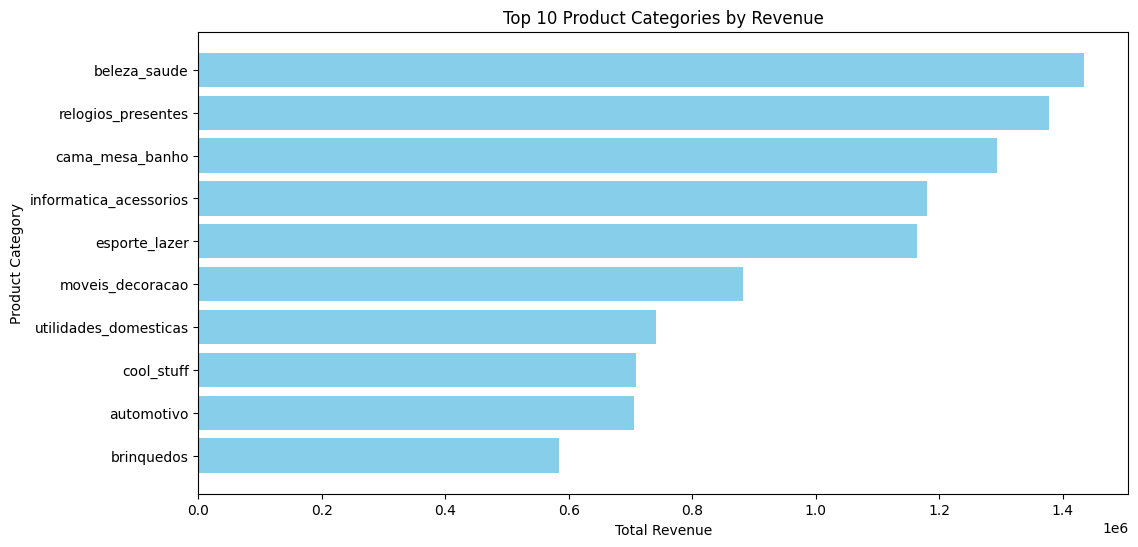

In [161]:
# Visualisasi untuk kontribusi revenue per kategori produk
plt.figure(figsize=(12, 6))
plt.barh(top_10_products['product_category_name'], top_10_products['total_revenue'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.title('Top 10 Product Categories by Revenue')
plt.gca().invert_yaxis()
plt.show()

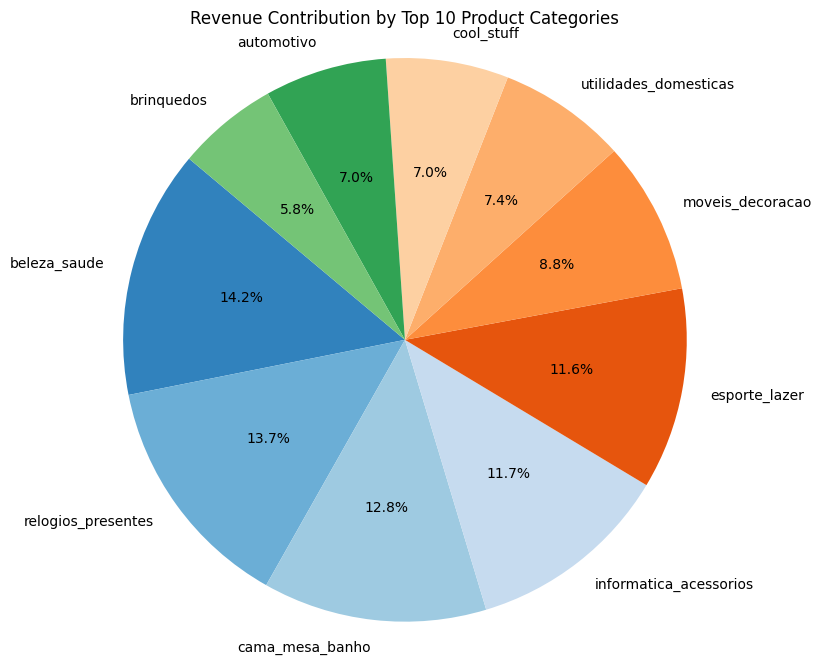

In [162]:
# Visualisasi untuk kontribusi top 10 produk terhadap total revenue
plt.figure(figsize=(8, 8))
plt.pie(
    top_10_products['total_revenue'], 
    labels=top_10_products['product_category_name'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20c.colors
)
plt.title('Revenue Contribution by Top 10 Product Categories')
plt.axis('equal')
plt.show()

##### Bagaimana distribusi metode pembayaran yang digunakan pelanggan, dan metode mana yang mendominasi?

In [163]:
# Distribusi metode pembayaran
payment_distribution_df = all_df['payment_type'].value_counts().reset_index()
payment_distribution_df.columns = ['payment_type', 'count']

# Menambahkan persentase distribusi
total_payments = payment_distribution_df['count'].sum()
payment_distribution_df['percentage'] = (payment_distribution_df['count'] / total_payments) * 100
payment_distribution_df

,payment_type,count,percentage
0,credit_card,102310,73.801829
1,boleto,27590,19.902184
2,voucher,6722,4.848948
3,debit_card,2006,1.447038


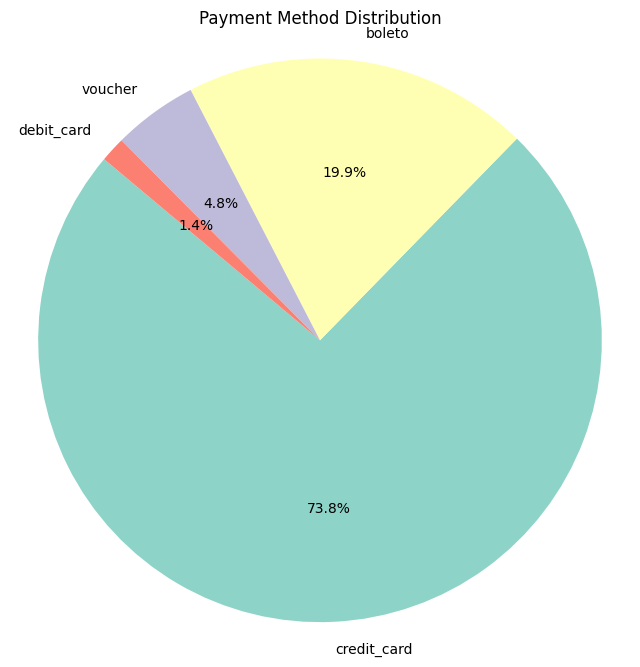

In [164]:
# Visualisasi untuk distribusi metode pembayaran
plt.figure(figsize=(8, 8))
plt.pie(
    payment_distribution_df['count'], 
    labels=payment_distribution_df['payment_type'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set3.colors
)
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()

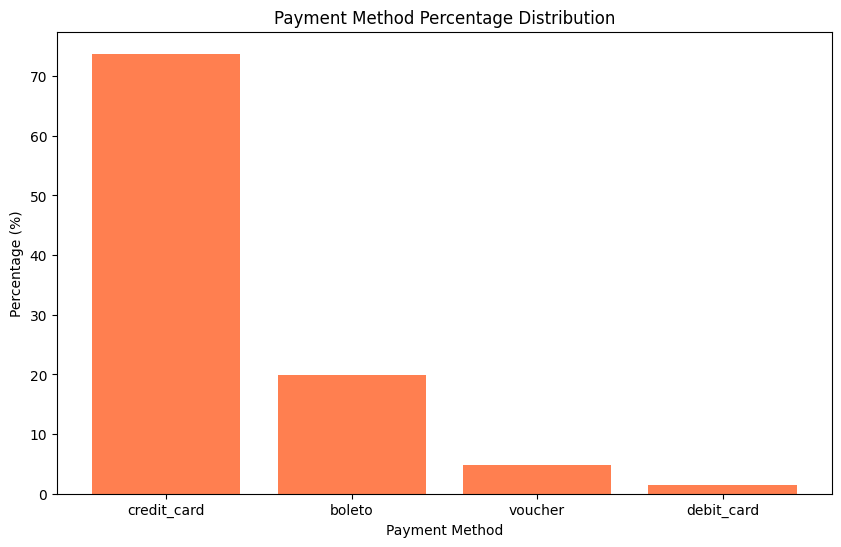

In [165]:
# Visualisasi untuk metode pembayaran dengan persentase
plt.figure(figsize=(10, 6))
plt.bar(payment_distribution_df['payment_type'], payment_distribution_df['percentage'], color='coral')
plt.xlabel('Payment Method')
plt.ylabel('Percentage (%)')
plt.title('Payment Method Percentage Distribution')
plt.show()

##### Apakah rating ulasan pelanggan memengaruhi nilai penjualan (revenue)?

In [166]:
# Menghitung rata-rata revenue berdasarkan skor review
review_revenue_df = all_df.groupby('review_score').agg({
    'price': 'mean',
    'order_id': 'count'
}).reset_index()
review_revenue_df.rename(columns={'price': 'avg_revenue', 'order_id': 'total_orders'}, inplace=True)
review_revenue_df

,review_score,avg_revenue,total_orders
0,1.0,125.157615,17756
1,2.0,109.665049,4718
2,3.0,106.816423,11622
3,4.0,115.480864,25581
4,5.0,118.131893,77837


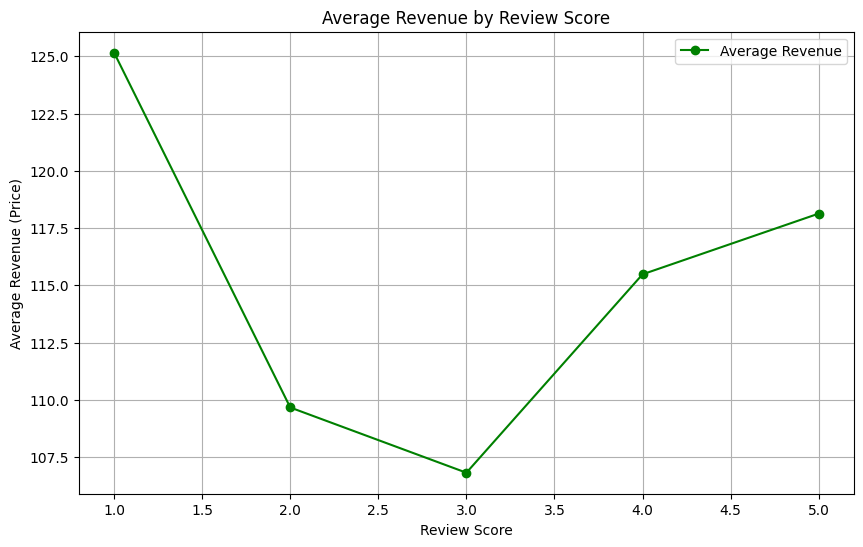

In [167]:
# Visualisasi untuk rata-rata revenue per skor review
plt.figure(figsize=(10, 6))
plt.plot(
    review_revenue_df['review_score'], 
    review_revenue_df['avg_revenue'], 
    marker='o', 
    color='green', 
    label='Average Revenue'
)
plt.xlabel('Review Score')
plt.ylabel('Average Revenue (Price)')
plt.title('Average Revenue by Review Score')
plt.legend()
plt.grid(True)
plt.show()

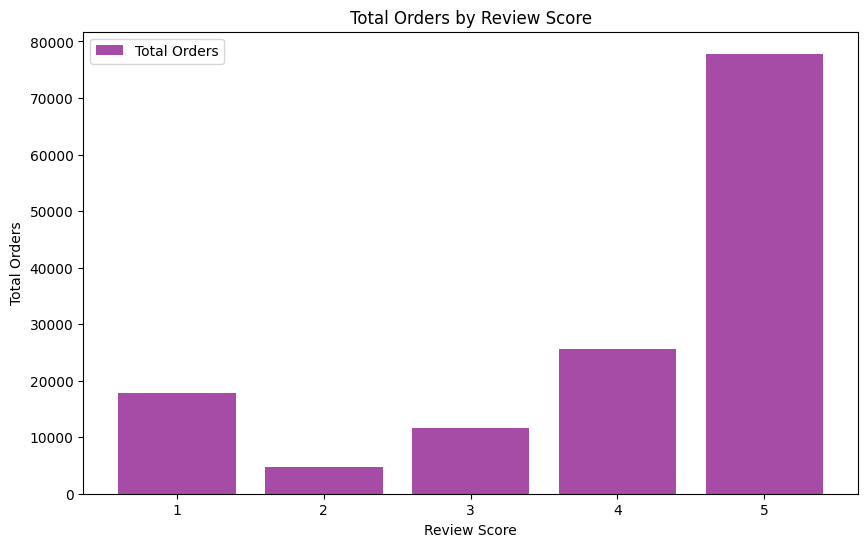

In [168]:
# Visualisasi untuk jumlah pesanan per skor review
plt.figure(figsize=(10, 6))
plt.bar(
    review_revenue_df['review_score'], 
    review_revenue_df['total_orders'], 
    color='purple', 
    alpha=0.7, 
    label='Total Orders'
)
plt.xlabel('Review Score')
plt.ylabel('Total Orders')
plt.title('Total Orders by Review Score')
plt.legend()
plt.show()

### INSIGHT

1. Kategori produk 'beleza_suede' menghasilkan persentasi kontribusi sebesar 8.95% dengan total revenue sebesar 1.434.886.88.
2. Lima kategori teratas menghasilkan lebih dari 40% dari total revenue, yang menunjukkan bahwa sebagian besar pendapatan berasal dari kategori-kategori tersebut. Sedangkan peringkat kategori selanjutnya masing-masing berkontribusi antara 4.4% - 5.5% dari total revenue yang juga signifikan tetapi lebih kecil dibandingkan dengan kategori teratas.
3. Meningkatkan revenue pada kategori yang masih menghasilkan revenue kecil seperti melalui promosi atau memperbarui produk.
4. Credit card adalah metode pembayaran yang paling sering digunakan oleh pelanggan dan diikuti oleh boleto, voucher dan debit card. Untuk itu, strategi layanan pembayaran dapat difokuskan pada pengoptimalan metode pembayaran utama seperti credit card dan boleto.
5. Rating 5.0 memperoleh jumlah pesanan tertinggi yang menunjukkan hubungan positif antara rating tinggi dan jumlah pesanan. Sedangkan rating 1.0 memiliki revenue rata-rata tertinggi meskipun total pesanan reltif kecil.
6. Rating ulasan sangat mempengaruhi frekuensi pesanan secara signifikan meskipun dampaknya pada rata-rata revenue tidak selalu stabil. Meningkatkan rating ulasan dapat membantu meningkatkan jumlah pesanan.

### RFM Analysis

In [169]:
# Rename 'order_purchase_timestamp' -> 'order_date'
all_df.rename(columns={'order_purchase_timestamp': 'order_date'}, inplace=True)

# RFM DataFrame
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max",  # Recency: date of last order
    "order_id": "nunique",  # Frequency: total of unique order
    "price": "sum"  # Monetary: total of order values
})
# Rename columns
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,1,164.70
99437,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,1,47.90
99438,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,1,199.90
99439,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,1,21.80


In [170]:
# Recency
# Menentukan tanggal terbaru dalam dataset
recent_date = all_df["order_date"].max()
# Menghitung recency dalam hari
rfm_df["recency"] = (recent_date - rfm_df["max_order_timestamp"]).dt.days
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,292
1,000161a058600d5901f007fab4c27140,1,54.90,413
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,551
3,0002414f95344307404f0ace7a26f1d5,1,149.90,382
4,000379cdec625522490c315e70c7a9fb,1,93.00,153


In [171]:
# Melakukan pemberian skor untuk masing-masing RFM dan menormalisasikannya agar perbandingannya lebih mudah
# Ranking
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

# Normalisasi
rfm_df['r_rank_norm'] = (rfm_df['r_rank'] / rfm_df['r_rank'].max()) * 100
rfm_df['f_rank_norm'] = (rfm_df['f_rank'] / rfm_df['f_rank'].max()) * 100
rfm_df['m_rank_norm'] = (rfm_df['m_rank'] / rfm_df['m_rank'].max()) * 100

# Drop kolom rank awal
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,292,34.571756,100.0,48.461902
1,000161a058600d5901f007fab4c27140,1,54.90,413,16.962319,100.0,30.302390
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,551,2.885128,100.0,77.570117
3,0002414f95344307404f0ace7a26f1d5,1,149.90,382,21.308112,100.0,70.877706
4,000379cdec625522490c315e70c7a9fb,1,93.00,153,67.413843,100.0,50.738126


In [172]:
# Menghitung RFM dengan nilai yang telah ditentukan
# Recency = 0.15, menunjukkan seberapa baru pelanggan terakhir kali melakukan transaksi karena semakin kecil bobotnya, semakin kecil pengaruh waktu transaksi terakhir terhadap skor keseluruhan.
# Frequency = 0.28, mengukur seberapa sering pelanggan melakukan transaksi.
# Monetary = 0.57, mengukur nilai total pembelian pelanggan.
rfm_df['RFM_score'] = 0.15 * rfm_df['r_rank_norm'] + 0.28 * rfm_df['f_rank_norm'] + 0.57 * rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,292,34.57,100.0,48.46,3.04
1,000161a058600d5901f007fab4c27140,1,54.90,413,16.96,100.0,30.30,2.39
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,551,2.89,100.0,77.57,3.63
3,0002414f95344307404f0ace7a26f1d5,1,149.90,382,21.31,100.0,70.88,3.58
4,000379cdec625522490c315e70c7a9fb,1,93.00,153,67.41,100.0,50.74,3.35
...,...,...,...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,1,164.70,157,66.63,100.0,74.13,4.01
99437,fffeda5b6d849fbd39689bb92087f431,1,47.90,103,79.74,100.0,24.92,2.71
99438,ffff42319e9b2d713724ae527742af25,1,199.90,81,83.62,100.0,80.64,4.33
99439,ffffa3172527f765de70084a7e53aae8,1,21.80,365,23.63,100.0,7.97,1.80


##### Segmentasi customer

In [173]:
# Segmentasi berdasarkan RFM_score
rfm_df['customer_segment'] = np.where(rfm_df['RFM_score'] > 4.5, "Top customers",
                                      np.where(rfm_df['RFM_score'] > 4, "High value customer",
                                               np.where(rfm_df['RFM_score'] > 3, "Medium value customer",
                                                        np.where(rfm_df['RFM_score'] > 1.6, 'Low value customers',
                                                                 'Lost customers'))))
rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.04,Medium value customer
1,000161a058600d5901f007fab4c27140,2.39,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.63,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.58,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.35,Medium value customer
5,0004164d20a9e969af783496f3408652,3.65,Medium value customer
6,000419c5494106c306a97b5635748086,2.32,Low value customers
7,00046a560d407e99b969756e0b10f282,3.52,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.75,Low value customers
9,000598caf2ef4117407665ac33275130,2.15,Low value customers


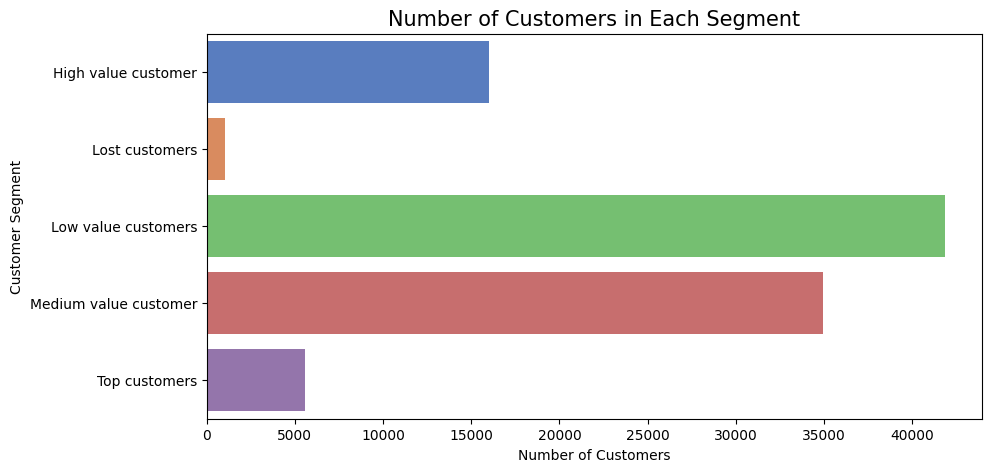

In [174]:
# Hitung jumlah customer per segmen
customer_segment_df = rfm_df.groupby("customer_segment", as_index=False)['customer_id'].nunique()
customer_segment_df.rename(columns={'customer_id': 'count'}, inplace=True)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(data=customer_segment_df, x='count', y='customer_segment', hue='customer_segment', palette="muted", legend=False)
plt.title("Number of Customers in Each Segment", fontsize=15)
plt.xlabel("Number of Customers")
plt.ylabel("Customer Segment")
plt.show()

### INSIGHT

1. Pelanggan yang memperoleh nilai tertinggi pada frekuensi, recency, dan monetary adalah pelanggan paling berharga yang perlu dijaga dengan program loyalitas atau penghargaan khusus. Fokus pada Top Customers dan High Value Customers untuk mempertahankan loyalitas mereka dengan program eksklusif seperti akses prioritas atau hadiah.
2. Sedangkan pelanggan dengan 'low value customers', dapat diminimalkan dengan mengadakan diskon pada beberapa produk agar dapat menarik mereka kembali untuk berbelanja.

### Conclusion

1. Penghasilan utama berasal dari lima kategori produk yang berada diatas. Kategori dengan kontribusi kecil memiliki potensi peningkatan melalui promosi dan inovasi produk. Mengoptimalkan metode pembayaran utama, seperti credit card dan boleto serta peningkatan rating ulasan dapat mendorong lebih banyak pesanan.
2. Top Customers & High Value Customers perlu dijaga melalui loyalitas ataupun penghargaan khusus pelanggan. Sedangkan, Low Value Customers dapat diminimalkan melalui diskon ataupun strategi pemasaran yang dapat menarik mereka kembali untuk berbelanja.

## Streamlit Dashboard

In [175]:
# CSS Styling untuk tema dark mode dan font
st.markdown("""
    <style>
    @import url('https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap');
    .block-container {
        background-color: #1E1E1E;
        color: #F5F5F5;
        font-family: 'Roboto', sans-serif;
    }
    .stSidebar {
        background-color: #282828;
        color: #F5F5F5;
    }
    h1, h2, h3 {
        color: #FFA500;
    }
    .footer {
        text-align: center;
        font-size: 12px;
        margin-top: 50px;
        color: #A9A9A9;
    }
    </style>
""", unsafe_allow_html=True)

2025-01-13 23:01:45.177 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:01:50.089 
  command:

    streamlit run C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-13 23:01:50.090 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [176]:
# Load Cleaned Data
all_df = pd.read_csv("all_df.csv")
all_df.head()

,customer_id,geolocation_zip_code_prefix,seller_id_x,order_id,order_purchase_timestamp,order_item_id,price,freight_value,review_id,review_score,product_category_name,seller_id_y,payment_type,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409.0,NaN,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,146.87
1,18955e83d337fd6b2def6b18a428ac77,9790.0,NaN,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1.0,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,utilidades_domesticas,b8bc237ba3788b23da09c0f1f3a3288c,credit_card,335.48
2,4e7b3e00288586ebd08712fdd0374a03,1151.0,NaN,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1.0,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,8775.0,NaN,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1.0,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5.0,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,credit_card,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056.0,8d46553a36e68f95350a200c12f8f2e2,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1.0,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5.0,casa_conforto,4a3ca9315b744ce9f8e9374361493884,credit_card,252.25


In [177]:
# Sidebar untuk Profil Pengguna
with st.sidebar:
    # st.image("profile.png", width=150)  # Foto profil
    st.markdown("""
        <h1 style="color:#FAB387;">👤 Profile</h3>
        <p><strong>Name:</strong> Rizki Amanda Putri</p>
        <p><strong>Role:</strong> Data Scientist</p>
        """, unsafe_allow_html=True)
    analysis_options = [
        "🛒 Top Revenue-Contributing Products and Their Share in Total Revenue",
        "💳 Distribution of Payment Methods and the Dominance of Each",
        "🌟 Impact of Customer Review Ratings on Revenue",
        "🔧 RFM Analysis"
    ]
    
    all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
    # Urutkan data berdasarkan 'order_purchase_timestamp'
    all_df.sort_values(by='order_purchase_timestamp', inplace=True)
    all_df.reset_index(drop=True, inplace=True)
    
    # Tentukan nilai minimum dan maksimum dari kolom tanggal
    min_date = all_df['order_purchase_timestamp'].min().date()
    max_date = all_df['order_purchase_timestamp'].max().date()
    
    # Sidebar di dashboard Streamlit
    with st.sidebar:
        # Menambahkan logo perusahaan (opsional)
        # st.image("https://github.com/dicodingacademy/assets/raw/main/logo.png")
        
        # Input rentang waktu dengan nilai default dari min_date ke max_date
        start_date, end_date = st.date_input(
            label='Rentang Waktu',
            min_value=min_date,
            max_value=max_date,
            value=[min_date, max_date]
        )
    
    # Filter data berdasarkan rentang tanggal
    main_df = all_df[
        (all_df['order_purchase_timestamp'] >= pd.Timestamp(start_date)) & 
        (all_df['order_purchase_timestamp'] <= pd.Timestamp(end_date))
    ]
    
    # Tampilkan hasil filter data
    # st.write(main_df)
    
    selected_analysis = st.selectbox("🔍 Select Analysis", analysis_options)

2025-01-13 23:01:50.941 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:01:50.942 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:01:51.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:01:51.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:01:51.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:01:51.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:01:51.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:01:51.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [182]:
# Analysis 1: Top Revenue-Contributing Products and Their Share in Total Revenue
if selected_analysis == "🛒 Top Revenue-Contributing Products and Their Share in Total Revenue":
    # Analisis dan visualisasi
    product_revenue_df = main_df.groupby('product_category_name').agg({
        'price': 'sum'
    }).reset_index()
    product_revenue_df.rename(columns={'price': 'total_revenue'}, inplace=True)
    top_products_df = product_revenue_df.sort_values(by='total_revenue', ascending=False)
    total_revenue = top_products_df['total_revenue'].sum()
    top_products_df['percentage_contribution'] = (top_products_df['total_revenue'] / total_revenue) * 100
    top_10_products = top_products_df.head(10)

    st.subheader("🌟 Top 10 Produk Berdasarkan Revenue")
    st.dataframe(top_10_products)

    # Bar chart
    st.subheader("📊 Kontribusi Revenue per Kategori Produk")
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.barh(top_10_products['product_category_name'], top_10_products['total_revenue'], color='skyblue')
    ax.set_xlabel("Total Revenue")
    ax.set_ylabel("Product Category")
    ax.set_title("Top 10 Product Categories by Revenue")
    ax.invert_yaxis()
    st.pyplot(fig)

    # Pie chart
    st.subheader("🥇 Persentase Kontribusi Top 10 Produk terhadap Total Revenue")
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(
        top_10_products['total_revenue'], 
        labels=top_10_products['product_category_name'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.tab20c.colors
    )
    ax.set_title("Revenue Contribution by Top 10 Product Categories")
    st.pyplot(fig)

# Analysis 2: Distribution of Payment Methods and the Dominance of Each
elif selected_analysis == "💳 Distribution of Payment Methods and the Dominance of Each":
    # Analisis dan visualisasi
    payment_distribution_df = main_df['payment_type'].value_counts().reset_index()
    payment_distribution_df.columns = ['payment_type', 'count']
    total_payments = payment_distribution_df['count'].sum()
    payment_distribution_df['percentage'] = (payment_distribution_df['count'] / total_payments) * 100

    st.subheader("💳 Distribusi Metode Pembayaran")
    st.dataframe(payment_distribution_df)

    # Pie chart
    st.subheader("📈 Distribusi Metode Pembayaran dalam Persentase")
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(
        payment_distribution_df['count'], 
        labels=payment_distribution_df['payment_type'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Set3.colors
    )
    ax.set_title("Payment Method Distribution")
    st.pyplot(fig)

    # Bar chart
    st.subheader("🔢 Distribusi Metode Pembayaran dalam Angka")
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(payment_distribution_df['payment_type'], payment_distribution_df['percentage'], color='coral')
    ax.set_xlabel("Payment Method")
    ax.set_ylabel("Percentage (%)")
    ax.set_title("Payment Method Percentage Distribution")
    st.pyplot(fig)

# Analysis 3: Impact of Customer Review Ratings on Revenue
elif selected_analysis == "🌟 Impact of Customer Review Ratings on Revenue":
    # Analisis dan visualisasi
    review_revenue_df = main_df.groupby('review_score').agg({
        'price': 'mean',
        'order_id': 'count'
    }).reset_index()
    review_revenue_df.rename(columns={'price': 'avg_revenue', 'order_id': 'total_orders'}, inplace=True)

    st.subheader("💵 Rata-rata Revenue dan Total Pesanan berdasarkan Skor Review")
    st.dataframe(review_revenue_df)

    # Line chart
    st.subheader("📉 Rata-rata Revenue berdasarkan Skor Review")
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(
        review_revenue_df['review_score'], 
        review_revenue_df['avg_revenue'], 
        marker='o', 
        color='green', 
        label='Average Revenue'
    )
    ax.set_xlabel("Review Score")
    ax.set_ylabel("Average Revenue (Price)")
    ax.set_title("Average Revenue by Review Score")
    ax.legend()
    ax.grid(True)
    st.pyplot(fig)

    # Bar chart
    st.subheader("🛍️ Total Pesanan berdasarkan Skor Review")
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(
        review_revenue_df['review_score'], 
        review_revenue_df['total_orders'], 
        color='purple', 
        alpha=0.7, 
        label='Total Orders'
    )
    ax.set_xlabel("Review Score")
    ax.set_ylabel("Total Orders")
    ax.set_title("Total Orders by Review Score")
    ax.legend()
    st.pyplot(fig)

# Analysis 4: RFM Analysis
elif selected_analysis == "🔧 RFM Analysis":
    # Analisis dan visualisasi
    main_df.rename(columns={'order_purchase_timestamp': 'order_date'}, inplace=True)
    # kolom 'order_date' dalam format datetime
    # main_df['order_date'] = pd.to_datetime(all_df['order_date'])
    rfm_df = main_df.groupby(by="customer_id", as_index=False).agg({
        "order_date": "max",
        "order_id": "nunique",
        "price": "sum"
    })
    rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
    recent_date = main_df["order_date"].max()
    rfm_df["recency"] = (recent_date - rfm_df["max_order_timestamp"]).dt.days
    rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
    
    # Ranks dan normalisasi
    rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
    rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
    rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)
    rfm_df['r_rank_norm'] = (rfm_df['r_rank'] / rfm_df['r_rank'].max()) * 100
    rfm_df['f_rank_norm'] = (rfm_df['f_rank'] / rfm_df['f_rank'].max()) * 100
    rfm_df['m_rank_norm'] = (rfm_df['m_rank'] / rfm_df['m_rank'].max()) * 100
    rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
    
    # Hitung skor RFM
    rfm_df['RFM_score'] = 0.15 * rfm_df['r_rank_norm'] + 0.28 * rfm_df['f_rank_norm'] + 0.57 * rfm_df['m_rank_norm']
    rfm_df['RFM_score'] *= 0.05
    rfm_df = rfm_df.round(2)
    
    # Segmentasi pelanggan berdasarkan skor RFM
    rfm_df['customer_segment'] = np.where(rfm_df['RFM_score'] > 4.5, "Top customers",
                                          np.where(rfm_df['RFM_score'] > 4, "High value customer",
                                                   np.where(rfm_df['RFM_score'] > 3, "Medium value customer",
                                                            np.where(rfm_df['RFM_score'] > 1.6, 'Low value customers',
                                                                     'Lost customers'))))
    
    # Rekapitulasi segmen pelanggan
    customer_segment_df = rfm_df.groupby("customer_segment", as_index=False)['customer_id'].nunique()
    customer_segment_df.rename(columns={'customer_id': 'count'}, inplace=True)

    st.subheader("📊 RFM Metrics")
    st.dataframe(rfm_df.head(10))

    st.subheader("👥 Segmentasi Pelanggan")
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(data=customer_segment_df, x='count', y='customer_segment', palette="muted", ax=ax)
    ax.set_title("Number of Customers in Each Segment", fontsize=15)
    ax.set_xlabel("Number of Customers")
    ax.set_ylabel("Customer Segment")
    st.pyplot(fig)

2025-01-13 23:04:15.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:04:15.510 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:04:15.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:04:15.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:04:15.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:04:15.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:04:15.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:04:16.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [184]:
# Footer
st.markdown(
    "<p class='footer'>© 2025 Your Name | All Rights Reserved</p>",
    unsafe_allow_html=True
)

2025-01-13 23:07:10.080 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 23:07:10.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()